In [ ]:
# Mount Google Drive (only once per session)
from google.colab import drive
drive.mount('/content/drive')

# Import libraries (once per session)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator, AutoMinorLocator

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def plot_rheometer_data(file_path, title, color_g_prime='tab:blue', color_g_double_prime='tab:orange'):
    # Read CSV file with UTF-16 encoding and tab separator
    df = pd.read_csv(file_path, encoding='utf-16', sep='\t')
    df = df.rename(columns=lambda x: x.strip())

    # Clean and convert data
    df['Temperature'] = df['Temperature'].str.replace(',', '.').astype(float)
    df["Storage Modulus"] = df["Storage Modulus"].str.replace(",", ".").astype(float)
    df["Loss Modulus"] = df["Loss Modulus"].str.replace(",", ".").astype(float)

    # Filter out zeros for log plot
    mask = (df["Storage Modulus"] > 0) & (df["Loss Modulus"] > 0)
    temp = df['Temperature'][mask]
    Gp = df["Storage Modulus"][mask]
    Gpp = df["Loss Modulus"][mask]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(temp, Gp, marker='s', linestyle='-', color=color_g_prime, label=r"$G'$ (Storage modulus)")
    plt.plot(temp, Gpp, marker='^', linestyle='-', color=color_g_double_prime, label=r"$G''$ (Loss modulus)")
    plt.yscale('log')
    plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
    plt.ylabel(r"G', G'' (Pa)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(np.arange(int(temp.min()), int(temp.max()) + 1, 1))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

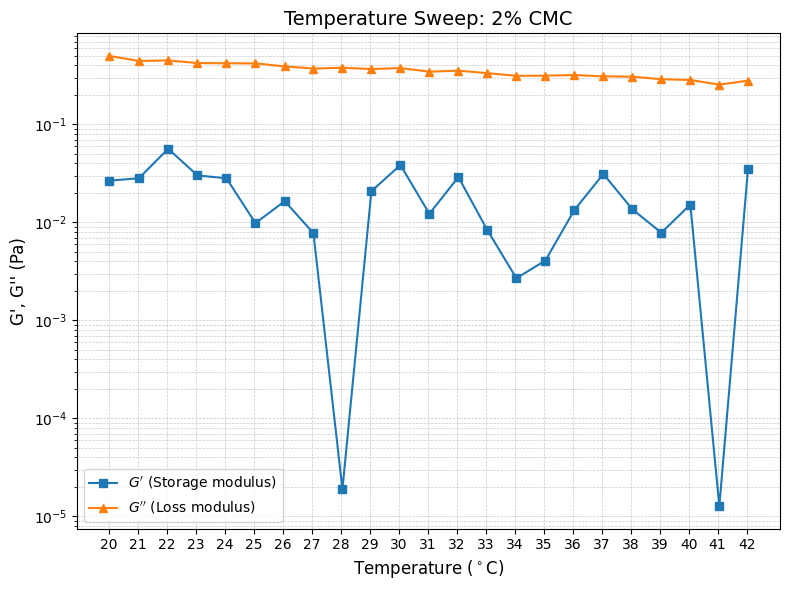

In [ ]:
# === CHANGE THESE ===
file_path = "/content/drive/MyDrive/Tables cleaned/Cellulose 2% Temp Sweep.csv"  # Change this path
title = "Temperature Sweep: 2% CMC"                      # Change graph title
color_g_prime = "tab:blue"                                     # Optional color change
color_g_double_prime = "tab:orange"

# === RUN THIS ===
plot_rheometer_data(file_path, title, color_g_prime, color_g_double_prime)

In [ ]:
def plot_Gprime_Gdoubleprime_multiple(file_info_list, plot_title):
    """
    file_info_list: list of tuples -> [(file_path, label_base, color), ...]
    plot_title: string
    """
    plt.figure(figsize=(8, 6))
    all_temps = []

    for file_path, label_base, color in file_info_list:
        df = pd.read_csv(file_path, encoding='utf-16', sep='\t')
        df = df.rename(columns=lambda x: x.strip())

        df['Temperature'] = df['Temperature'].str.replace(',', '.').astype(float)
        df["Storage Modulus"] = df["Storage Modulus"].str.replace(",", ".").astype(float)
        df["Loss Modulus"] = df["Loss Modulus"].str.replace(",", ".").astype(float)

        mask = (df["Storage Modulus"] > 0) & (df["Loss Modulus"] > 0)
        temp = df['Temperature'][mask]
        Gp = df["Storage Modulus"][mask]
        Gpp = df["Loss Modulus"][mask]

        all_temps.extend(temp)

        # Plot G' and G''
        plt.plot(temp, Gp, marker='s', linestyle='-', color=color, label=f"{label_base} $G'$")
        plt.plot(temp, Gpp, marker='^', linestyle='-', color=color, label=f"{label_base} $G''$")

    # Axis settings
    plt.yscale('log')
    plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
    plt.ylabel(r"G', G'' (Pa)", fontsize=12)
    plt.title(plot_title, fontsize=14)

    # Set x-ticks: 1°C steps from min to max across all datasets
    temp_min = int(min(all_temps))
    temp_max = int(max(all_temps))
    plt.xticks(np.arange(temp_min, temp_max + 1, 1))

    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

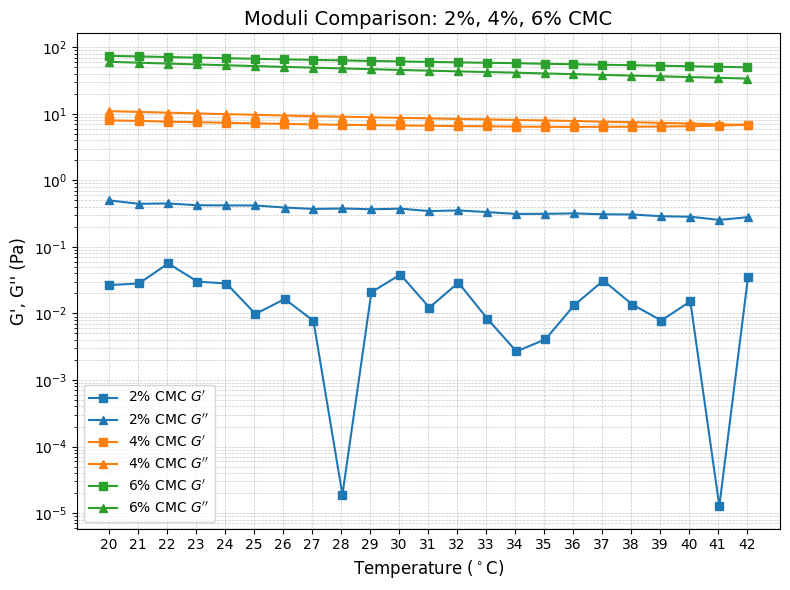

In [ ]:
# === CHANGE THESE ===
file_info = [
    ("/content/drive/MyDrive/Tables cleaned/Cellulose 2% Temp Sweep.csv", "2% CMC", "tab:blue"),
    ("/content/drive/MyDrive/Tables cleaned/Cellulose 4% Temp Sweep.csv", "4% CMC", "tab:orange"),
    ("/content/drive/MyDrive/Tables cleaned/Cellulose 6% Temp Sweep p25.csv", "6% CMC", "tab:green")
]

title = "Moduli Comparison: 2%, 4%, 6% CMC"

# === RUN THIS ===
plot_Gprime_Gdoubleprime_multiple(file_info, title)

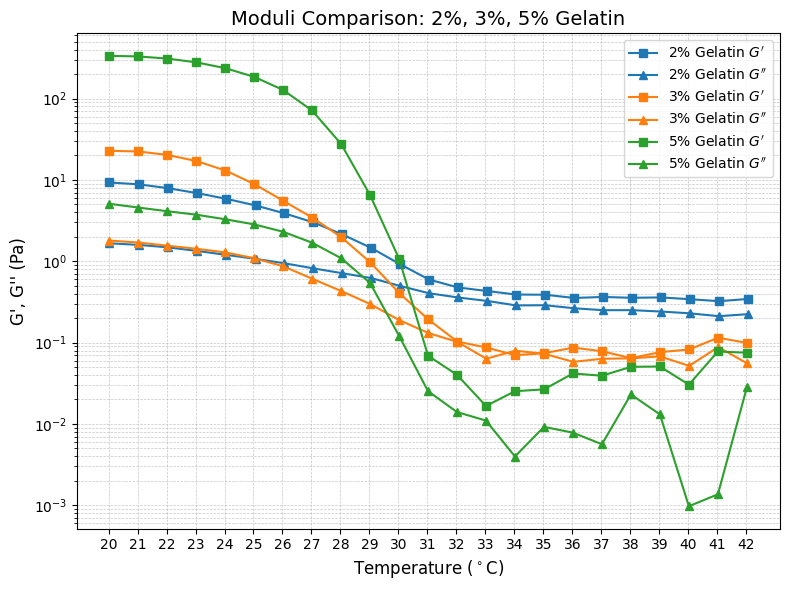

In [ ]:
# === CHANGE THESE ===
file_info = [
    ("/content/drive/MyDrive/Tables cleaned/Gelatin 2% Temp Sweep.csv", "2% Gelatin", "tab:blue"),
    ("/content/drive/MyDrive/Tables cleaned/Gelatin 3% Temp Sweep p25.csv", "3% Gelatin", "tab:orange"),
    ("/content/drive/MyDrive/Tables cleaned/Gelatin 5% Temp Sweep.csv", "5% Gelatin", "tab:green")
]

title = "Moduli Comparison: 2%, 3%, 5% Gelatin"

# === RUN THIS ===
plot_Gprime_Gdoubleprime_multiple(file_info, title)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	13.606	1147.2	718.76	0.627	20	3.9608	TruStrain™
2	0.0101	14.565	1235	758.22	0.614	21.01	4.2399	TruStrain™
3	0.0101	15.662	1338.7	797.66	0.596	22.02	4.5594	TruStrain™
4	0.0101	16.721	1441.5	830.59	0.576	23.02	4.8676	TruStrain™
5	0.0101	17.709	1537.4	860.93	0.56	24.01	5.1554	TruStrain™
6	0.0101	18.67	1627.6	895.49	0.55	25.02	5.4351	TruStrain™
7	0.0101	19.673	1718.3	937.49	0.546	26.02	5.727	TruStrain™
8	0.0101	20.706	1808.6	986.7	0.546	27.02	6.0277	TruStrain™
9	0.0101	21.695	1891.1	1041	0.55	28.02	6.3157	TruStrain™
10	0.0101	22.339	1939.6	1085.7	0.56	29.02	6.5032	TruStrain™
11	0.0101	22.025	1901.8	1088.8	0.573	30.02	6.4117	TruStrain™
12	0.0101	21.158	1812.8	1070.3	0.59	31.02	6.1593	TruStrain™
13	0.0101	20.271	1719.5	1054.3	0.613	32.02	5.901	TruStrain™
14	0.0101	19.016	1600.2	1009.6	0.631	33.02	5.5357	TruStrain™
15	0.0101	17.081	1434.5	911.37	0.635	34.02	4.9725	TruStrain™
16	0.0101	14.993	1263.5	793.02	0.628	35.02	4.3646	TruStrain™
17	0.0101	13.351	1132.1	694.91	0.614	36.02	3.8865	TruStrain™
18	0.0101	12.201	1043.4	620.64	0.595	37.02	3.5519	TruStrain™
19	0.0101	11.744	1017.1	575.2	0.566	38.02	3.4188	TruStrain™
20	0.0101	12.037	1062.6	552.42	0.52	39.02	3.504	TruStrain™
21	0.0101	12.978	1175.1	535.19	0.455	40.02	3.7779	TruStrain™
22	0.0101	14.398	1338.8	509.69	0.381	41.02	4.1913	TruStrain™
23	0.0101	16.012	1520.7	475.02	0.312	42.02	4.6612	TruStrain™
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	17.174	1494.6	828.14	0.554	20	4.9995	TruStrain™
2	0.0101	17.374	1514.3	833.65	0.551	21.03	5.0576	TruStrain™
3	0.0101	17.718	1547	845.4	0.546	22.03	5.1579	TruStrain™
4	0.0101	18.253	1595.9	866.93	0.543	23.03	5.3137	TruStrain™
5	0.0101	18.955	1658.7	897.65	0.541	24.03	5.518	TruStrain™
6	0.0101	19.79	1731.6	937.46	0.541	25.03	5.761	TruStrain™
7	0.0101	20.776	1816.1	987.52	0.544	26.03	6.0481	TruStrain™
8	0.0101	21.894	1909.1	1049.3	0.55	27.03	6.3736	TruStrain™
9	0.0101	23.125	2008.7	1122.2	0.559	28.03	6.732	TruStrain™
10	0.0101	24.274	2098.5	1195.7	0.57	29.03	7.0664	TruStrain™
11	0.0101	24.637	2118.1	1233.9	0.583	30.03	7.172	TruStrain™
12	0.0101	24.05	2055.9	1224.7	0.596	31.03	7.0013	TruStrain™
13	0.0101	23.469	1993.1	1216.7	0.61	32.03	6.8321	TruStrain™
14	0.0101	23.071	1952	1208	0.619	33.03	6.7162	TruStrain™
15	0.0101	22.466	1904.5	1170.4	0.615	34.03	6.5402	TruStrain™
16	0.0101	21.747	1859.5	1106.4	0.595	35.03	6.3307	TruStrain™
17	0.0101	21.256	1847	1030.3	0.558	36.03	6.1878	TruStrain™
18	0.0101	21.293	1894.5	948.55	0.501	37.02	6.1987	TruStrain™
19	0.0101	21.904	2005.3	853.74	0.426	38.02	6.3765	TruStrain™
20	0.0101	22.883	2151.9	743.93	0.346	39.02	6.6614	TruStrain™
21	0.0101	23.927	2293.9	637.07	0.278	40.02	6.9653	TruStrain™
22	0.0101	24.834	2408.4	552.88	0.23	41.03	7.2295	TruStrain™
23	0.0101	25.376	2473	509.06	0.206	42.01	7.3872	TruStrain™
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	24.181	2140.4	1098.7	0.513	20	7.0392	TruStrain™
2	0.0101	24.245	2145.8	1102.2	0.514	21.03	7.058	TruStrain™
3	0.0101	24.59	2176.1	1118.3	0.514	22.03	7.1584	TruStrain™
4	0.0101	25.273	2236.2	1150	0.514	23.03	7.3572	TruStrain™
5	0.0101	26.301	2325.8	1199.6	0.516	24.03	7.6565	TruStrain™
6	0.0101	27.688	2445.7	1268.1	0.518	25.03	8.0603	TruStrain™
7	0.0101	29.495	2601.7	1357.8	0.522	26.03	8.5861	TruStrain™
8	0.0101	31.808	2802.3	1470.9	0.525	27.03	9.2596	TruStrain™
9	0.0101	34.506	3040.4	1594.8	0.525	28.03	10.045	TruStrain™
10	0.0101	37.459	3309.8	1713.8	0.518	29.03	10.905	TruStrain™
11	0.0101	40.147	3568.8	1794.4	0.503	30.03	11.687	TruStrain™
12	0.0101	41.892	3756.5	1806.2	0.481	31.03	12.195	TruStrain™
13	0.0101	41.389	3740.6	1722.7	0.461	32.03	12.049	TruStrain™
14	0.0101	38.772	3522.5	1573	0.447	33.03	11.287	TruStrain™
15	0.0101	35.827	3275.8	1405.9	0.429	34.02	10.43	TruStrain™
16	0.0101	33.774	3123.5	1239.5	0.397	35.03	9.8318	TruStrain™
17	0.0101	33.102	3112.9	1075.9	0.346	36.03	9.6363	TruStrain™
18	0.0101	33.609	3215.9	917.08	0.285	37.03	9.784	TruStrain™
19	0.0101	34.802	3378.5	759.36	0.225	38.03	10.131	TruStrain™
20	0.0101	36.147	3540.2	634.56	0.179	39.02	10.523	TruStrain™
21	0.0101	37.238	3661.9	564.66	0.154	40.02	10.84	TruStrain™
22	0.0101	37.738	3715.7	541.2	0.146	41.02	10.986	TruStrain™
23	0.0101	37.766	3718.2	543.36	0.146	42.02	10.994	TruStrain™
"""



In [ ]:
def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Temperature']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Temperature'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Temperature'], df['Storage Modulus'], df['Loss Modulus'], label

In [ ]:
datasets = [
    clean_and_extract(raw_data1, "30% PCLA-PEG-PCLA + 1% gelatin + 1% CNCs + 0.3% CMC"),
    clean_and_extract(raw_data2, "30% PCLA-PEG-PCLA + 1% gelatin + 1% CNCs + 0.5% CMC"),
    clean_and_extract(raw_data3, "30% PCLA-PEG-PCLA + 1% gelatin + 1% CNCs + 1% CMC"),
    # Add more like: clean_and_extract(raw_data3, "Sample C")
]

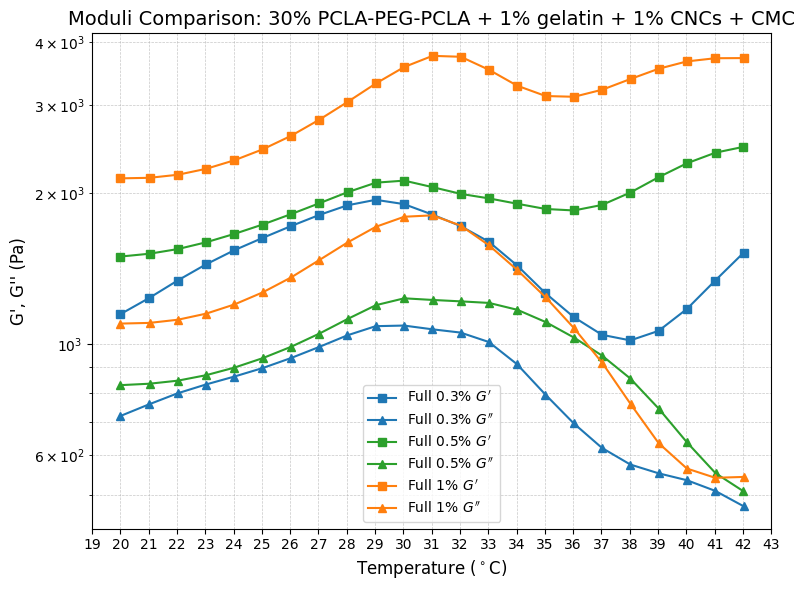

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	13.606	1147.2	718.76	0.627	20	3.9608	TruStrain™
2	0.0101	14.565	1235	758.22	0.614	21.01	4.2399	TruStrain™
3	0.0101	15.662	1338.7	797.66	0.596	22.02	4.5594	TruStrain™
4	0.0101	16.721	1441.5	830.59	0.576	23.02	4.8676	TruStrain™
5	0.0101	17.709	1537.4	860.93	0.56	24.01	5.1554	TruStrain™
6	0.0101	18.67	1627.6	895.49	0.55	25.02	5.4351	TruStrain™
7	0.0101	19.673	1718.3	937.49	0.546	26.02	5.727	TruStrain™
8	0.0101	20.706	1808.6	986.7	0.546	27.02	6.0277	TruStrain™
9	0.0101	21.695	1891.1	1041	0.55	28.02	6.3157	TruStrain™
10	0.0101	22.339	1939.6	1085.7	0.56	29.02	6.5032	TruStrain™
11	0.0101	22.025	1901.8	1088.8	0.573	30.02	6.4117	TruStrain™
12	0.0101	21.158	1812.8	1070.3	0.59	31.02	6.1593	TruStrain™
13	0.0101	20.271	1719.5	1054.3	0.613	32.02	5.901	TruStrain™
14	0.0101	19.016	1600.2	1009.6	0.631	33.02	5.5357	TruStrain™
15	0.0101	17.081	1434.5	911.37	0.635	34.02	4.9725	TruStrain™
16	0.0101	14.993	1263.5	793.02	0.628	35.02	4.3646	TruStrain™
17	0.0101	13.351	1132.1	694.91	0.614	36.02	3.8865	TruStrain™
18	0.0101	12.201	1043.4	620.64	0.595	37.02	3.5519	TruStrain™
19	0.0101	11.744	1017.1	575.2	0.566	38.02	3.4188	TruStrain™
20	0.0101	12.037	1062.6	552.42	0.52	39.02	3.504	TruStrain™
21	0.0101	12.978	1175.1	535.19	0.455	40.02	3.7779	TruStrain™
22	0.0101	14.398	1338.8	509.69	0.381	41.02	4.1913	TruStrain™
23	0.0101	16.012	1520.7	475.02	0.312	42.02	4.6612	TruStrain™
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	17.174	1494.6	828.14	0.554	20	4.9995	TruStrain™
2	0.0101	17.374	1514.3	833.65	0.551	21.03	5.0576	TruStrain™
3	0.0101	17.718	1547	845.4	0.546	22.03	5.1579	TruStrain™
4	0.0101	18.253	1595.9	866.93	0.543	23.03	5.3137	TruStrain™
5	0.0101	18.955	1658.7	897.65	0.541	24.03	5.518	TruStrain™
6	0.0101	19.79	1731.6	937.46	0.541	25.03	5.761	TruStrain™
7	0.0101	20.776	1816.1	987.52	0.544	26.03	6.0481	TruStrain™
8	0.0101	21.894	1909.1	1049.3	0.55	27.03	6.3736	TruStrain™
9	0.0101	23.125	2008.7	1122.2	0.559	28.03	6.732	TruStrain™
10	0.0101	24.274	2098.5	1195.7	0.57	29.03	7.0664	TruStrain™
11	0.0101	24.637	2118.1	1233.9	0.583	30.03	7.172	TruStrain™
12	0.0101	24.05	2055.9	1224.7	0.596	31.03	7.0013	TruStrain™
13	0.0101	23.469	1993.1	1216.7	0.61	32.03	6.8321	TruStrain™
14	0.0101	23.071	1952	1208	0.619	33.03	6.7162	TruStrain™
15	0.0101	22.466	1904.5	1170.4	0.615	34.03	6.5402	TruStrain™
16	0.0101	21.747	1859.5	1106.4	0.595	35.03	6.3307	TruStrain™
17	0.0101	21.256	1847	1030.3	0.558	36.03	6.1878	TruStrain™
18	0.0101	21.293	1894.5	948.55	0.501	37.02	6.1987	TruStrain™
19	0.0101	21.904	2005.3	853.74	0.426	38.02	6.3765	TruStrain™
20	0.0101	22.883	2151.9	743.93	0.346	39.02	6.6614	TruStrain™
21	0.0101	23.927	2293.9	637.07	0.278	40.02	6.9653	TruStrain™
22	0.0101	24.834	2408.4	552.88	0.23	41.03	7.2295	TruStrain™
23	0.0101	25.376	2473	509.06	0.206	42.01	7.3872	TruStrain™
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	24.181	2140.4	1098.7	0.513	20	7.0392	TruStrain™
2	0.0101	24.245	2145.8	1102.2	0.514	21.03	7.058	TruStrain™
3	0.0101	24.59	2176.1	1118.3	0.514	22.03	7.1584	TruStrain™
4	0.0101	25.273	2236.2	1150	0.514	23.03	7.3572	TruStrain™
5	0.0101	26.301	2325.8	1199.6	0.516	24.03	7.6565	TruStrain™
6	0.0101	27.688	2445.7	1268.1	0.518	25.03	8.0603	TruStrain™
7	0.0101	29.495	2601.7	1357.8	0.522	26.03	8.5861	TruStrain™
8	0.0101	31.808	2802.3	1470.9	0.525	27.03	9.2596	TruStrain™
9	0.0101	34.506	3040.4	1594.8	0.525	28.03	10.045	TruStrain™
10	0.0101	37.459	3309.8	1713.8	0.518	29.03	10.905	TruStrain™
11	0.0101	40.147	3568.8	1794.4	0.503	30.03	11.687	TruStrain™
12	0.0101	41.892	3756.5	1806.2	0.481	31.03	12.195	TruStrain™
13	0.0101	41.389	3740.6	1722.7	0.461	32.03	12.049	TruStrain™
14	0.0101	38.772	3522.5	1573	0.447	33.03	11.287	TruStrain™
15	0.0101	35.827	3275.8	1405.9	0.429	34.02	10.43	TruStrain™
16	0.0101	33.774	3123.5	1239.5	0.397	35.03	9.8318	TruStrain™
17	0.0101	33.102	3112.9	1075.9	0.346	36.03	9.6363	TruStrain™
18	0.0101	33.609	3215.9	917.08	0.285	37.03	9.784	TruStrain™
19	0.0101	34.802	3378.5	759.36	0.225	38.03	10.131	TruStrain™
20	0.0101	36.147	3540.2	634.56	0.179	39.02	10.523	TruStrain™
21	0.0101	37.238	3661.9	564.66	0.154	40.02	10.84	TruStrain™
22	0.0101	37.738	3715.7	541.2	0.146	41.02	10.986	TruStrain™
23	0.0101	37.766	3718.2	543.36	0.146	42.02	10.994	TruStrain™
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Temperature']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Temperature'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Temperature'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "Full 0.3%"),
    clean_and_extract(raw_data2, "Full 0.5%"),
    clean_and_extract(raw_data3, "Full 1%"),
    # Add more like: clean_and_extract(raw_data3, "Sample C")
]


# Colors of datasets
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', 'violet']

plt.figure(figsize=(8, 6))

all_temps = []

for i, (temp, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_temps.extend(temp)
    plt.plot(temp, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(temp, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Moduli Comparison: 30% PCLA-PEG-PCLA + 1% gelatin + 1% CNCs + CMC", fontsize=14)

temp_min = int(np.floor(min(all_temps)))
temp_max = int(np.ceil(max(all_temps)))

plt.xlim(temp_min, temp_max)
plt.xticks(np.arange(temp_min - 1, temp_max + 1, 1))  # 1 degree steps on x-axis

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(fontsize=10) #for legend inside the plot
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # for legend outside the plot
#plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space on the right
plt.show()


All 96 well positions:
A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12
B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12
C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12
D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12
E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12
F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12
G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, G11, G12
H1, H2, H3, H4, H5, H6, H7, H8, H9, H10, H11, H12


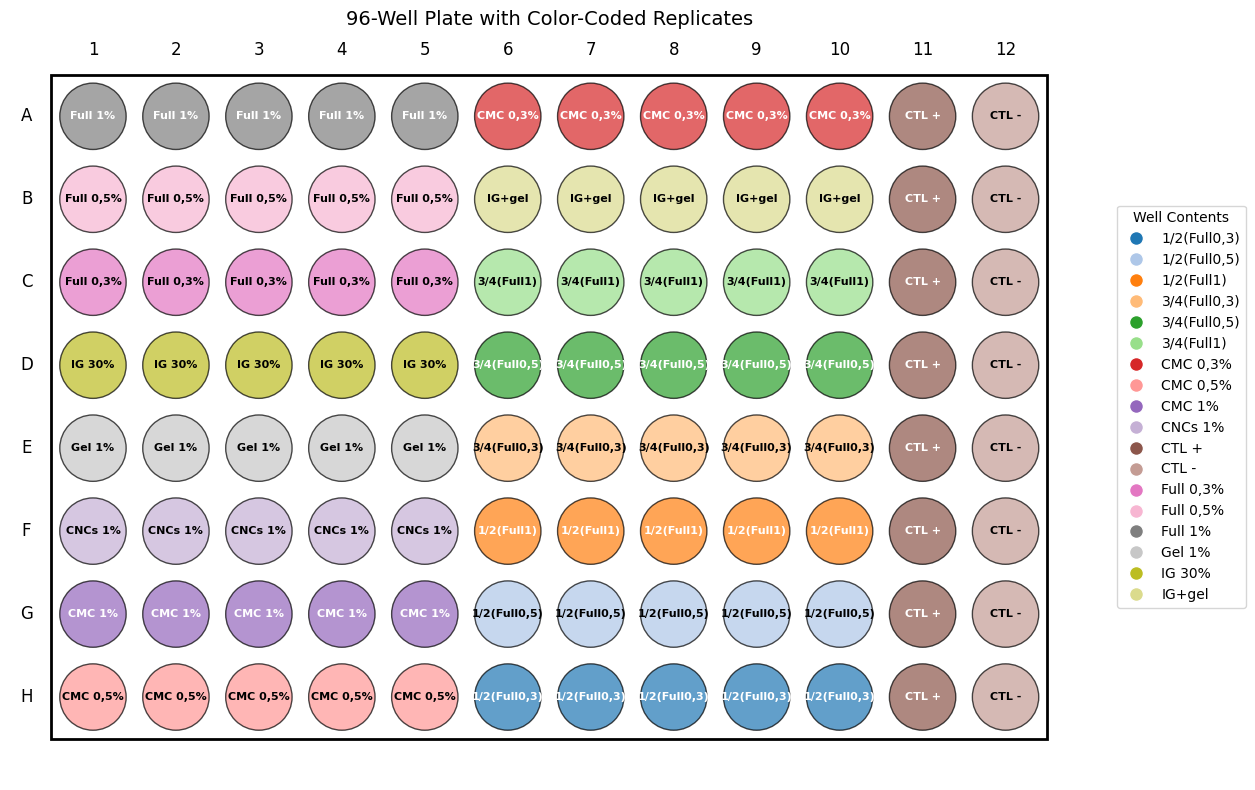

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle
import pandas as pd
import matplotlib.colors as mcolors

class WellPlateGenerator:
    def __init__(self):
        self.rows = 8
        self.cols = 12
        self.row_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
        self.col_labels = list(range(1, 13))
        self.well_data = {}  # Dictionary to store well contents

        # Generate all possible well positions
        self.all_wells = []
        for row in self.row_labels:
            for col in self.col_labels:
                self.all_wells.append(f"{row}{col}")

        # Setup color mapping
        self.color_map = {}

    def add_well_content(self, well_id, content):
        """Add content to a specific well

        Args:
            well_id (str): Well position (e.g., 'A1', 'H12')
            content (str): Text to display in the well
        """
        self.well_data[well_id] = content

    def add_multiple_wells(self, well_dict):
        """Add content to multiple wells at once

        Args:
            well_dict (dict): Dictionary mapping well IDs to content
                             e.g., {'A1': 'Sample 1', 'B2': 'Control'}
        """
        self.well_data.update(well_dict)

    def add_replicates(self, well_ids, content):
        """Add the same content to multiple wells (replicates)

        Args:
            well_ids (list): List of well positions (e.g., ['A1', 'A2', 'A3'])
            content (str): Text to display in all specified wells
        """
        for well_id in well_ids:
            self.well_data[well_id] = content

    def add_replicates_by_pattern(self, start_well, num_replicates, content, direction='right'):
        """Add replicates in a pattern starting from a specific well

        Args:
            start_well (str): Starting well position (e.g., 'A1')
            num_replicates (int): Number of replicates to add
            content (str): Text to display in all replicates
            direction (str): Direction to add replicates - 'right', 'down', 'diagonal'
        """
        if start_well[0] not in self.row_labels or not start_well[1:].isdigit():
            print(f"Invalid well position: {start_well}")
            return

        row_idx = self.row_labels.index(start_well[0])
        col_idx = int(start_well[1:]) - 1

        wells = []
        for i in range(num_replicates):
            if direction == 'right':
                # Move horizontally (same row, increasing column)
                if col_idx + i < self.cols:
                    wells.append(f"{self.row_labels[row_idx]}{self.col_labels[col_idx + i]}")
            elif direction == 'down':
                # Move vertically (same column, increasing row)
                if row_idx + i < self.rows:
                    wells.append(f"{self.row_labels[row_idx + i]}{self.col_labels[col_idx]}")
            elif direction == 'diagonal':
                # Move diagonally (increasing row and column)
                if row_idx + i < self.rows and col_idx + i < self.cols:
                    wells.append(f"{self.row_labels[row_idx + i]}{self.col_labels[col_idx + i]}")

        self.add_replicates(wells, content)
        return wells

    def clear_well(self, well_id):
        """Remove content from a specific well"""
        if well_id in self.well_data:
            del self.well_data[well_id]

    def clear_all_wells(self):
        """Remove all well contents"""
        self.well_data = {}

    def _generate_color_map(self):
        """Generate a color map for all unique well contents"""
        # Get unique content labels
        unique_contents = set(self.well_data.values())

        if '' in unique_contents:
            unique_contents.remove('')  # Don't assign color to empty wells

        # Use colorful colormaps
        cmap_name = 'tab20'  # Good for up to 20 distinct categories
        if len(unique_contents) > 20:
            cmap_name = 'tab20b'  # Extends to more categories
        if len(unique_contents) > 40:
            cmap_name = 'viridis'  # Continuous colormap for many categories

        # Use the recommended way to get colormaps (avoiding deprecation warning)
        cmap = plt.colormaps[cmap_name]

        # Assign colors to unique contents
        self.color_map = {}
        for i, content in enumerate(sorted(unique_contents)):
            if content:  # Skip empty content
                # Use a normalized color index
                color_idx = i / max(1, len(unique_contents) - 1)
                if cmap_name in ['tab20', 'tab20b']:
                    # For categorical maps, use discrete indices
                    color_idx = i % cmap.N
                    self.color_map[content] = cmap(color_idx)
                else:
                    # For continuous maps like viridis
                    self.color_map[content] = cmap(color_idx)

    def draw_plate(self, fig_size=(12, 8), title='96-Well Plate Layout', show_empty_codes=True,
                  add_legend=True, alpha=0.7):
        """Draw the plate with current well contents and color-coding

        Args:
            fig_size (tuple): Figure size (width, height)
            title (str): Title for the plot
            show_empty_codes (bool): Whether to show well codes in empty wells
            add_legend (bool): Whether to add a legend for the color-coding
            alpha (float): Alpha transparency for well colors

        Returns:
            tuple: Figure and axis objects
        """
        # Generate colors for the wells
        self._generate_color_map()

        # Calculate figure size to accommodate legend if needed
        if add_legend and self.color_map:
            legend_width = 2  # Extra width for legend
            adjusted_fig_size = (fig_size[0] + legend_width, fig_size[1])
        else:
            adjusted_fig_size = fig_size

        fig, ax = plt.subplots(figsize=adjusted_fig_size)

        # Draw plate outline
        plate = Rectangle((0, 0), self.cols, self.rows, fill=False, lw=2, color='black')
        ax.add_patch(plate)

        # For legend entries
        legend_elements = []

        # Draw wells and labels
        for i in range(self.rows):
            for j in range(self.cols):
                # Create well (circle)
                well_id = f"{self.row_labels[i]}{self.col_labels[j]}"
                content = self.well_data.get(well_id, '')
                is_filled = bool(content)

                # Set well appearance based on content
                if is_filled and content in self.color_map:
                    fc = self.color_map[content]
                else:
                    fc = 'white'

                well_alpha = alpha if is_filled else 0

                well = Circle((j + 0.5, i + 0.5), 0.4,
                              fill=True,
                              facecolor=fc,
                              alpha=well_alpha,
                              edgecolor='black')
                ax.add_patch(well)

                # Add row and column labels
                if j == 0:
                    ax.text(-0.3, i + 0.5, self.row_labels[i],
                            va='center', ha='center', fontsize=12)
                if i == 0:
                    ax.text(j + 0.5, -0.3, self.col_labels[j],
                            va='center', ha='center', fontsize=12)

                # Add well content if available
                if is_filled:
                    # Determine text color based on background color brightness
                    if isinstance(fc, tuple) and len(fc) >= 3:
                        # Calculate brightness using the luminance formula
                        brightness = 0.299 * fc[0] + 0.587 * fc[1] + 0.114 * fc[2]
                        text_color = 'black' if brightness > 0.6 else 'white'
                    else:
                        text_color = 'black'

                    ax.text(j + 0.5, i + 0.5, content,
                            va='center', ha='center', fontsize=8,
                            color=text_color, fontweight='bold')

                elif show_empty_codes:
                    # Show well code in small, light gray text for empty wells
                    ax.text(j + 0.5, i + 0.5, well_id,
                            va='center', ha='center', fontsize=7, color='gray', alpha=0.7)

        # Set axis properties
        ax.set_xlim(-0.5, self.cols + 0.5)
        ax.set_ylim(-0.5, self.rows + 0.5)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.invert_yaxis()  # Invert y-axis to match standard plate layout (A at top)

        # Add title
        ax.set_title(title, fontsize=14)

        # Add legend if requested
        if add_legend and self.color_map:
            # Create legend elements
            legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                        markerfacecolor=color, markersize=10,
                                        label=content)
                             for content, color in self.color_map.items()]

            # Position legend outside the plot
            if len(legend_elements) <= 20:
                # For a reasonable number of items, place to the right
                ax.legend(handles=legend_elements, loc='center left',
                        bbox_to_anchor=(1.02, 0.5), title="Well Contents")
            else:
                # For many items, place below the plot with multiple columns
                ncol = min(5, len(legend_elements) // 4 + 1)
                ax.legend(handles=legend_elements, loc='upper center',
                        bbox_to_anchor=(0.5, -0.15), title="Well Contents",
                        ncol=ncol)

        plt.tight_layout()
        return fig, ax

    def save_plate(self, filename='plate_layout.png', dpi=300):
        """Save the current plate layout as an image"""
        fig, _ = self.draw_plate()
        fig.savefig(filename, dpi=dpi, bbox_inches='tight')
        plt.close(fig)
        print(f"Plate layout saved as {filename}")

    def export_data(self, filename='plate_data.csv'):
        """Export the well contents to a CSV file"""
        data = []
        for well_id, content in self.well_data.items():
            row = well_id[0]
            col = int(well_id[1:])
            data.append({
                'Well': well_id,
                'Row': row,
                'Column': col,
                'Content': content
            })

        # Create DataFrame and sort by well position
        df = pd.DataFrame(data)
        if not df.empty:
            df = df.sort_values(['Row', 'Column'])
            df.to_csv(filename, index=False)
            print(f"Data exported to {filename}")
        else:
            print("No data to export")

    def import_from_csv(self, filename):
        """Import well data from a CSV file

        The CSV should have a 'Well' column and a 'Content' column
        """
        try:
            df = pd.read_csv(filename)
            if 'Well' in df.columns and 'Content' in df.columns:
                well_dict = dict(zip(df['Well'], df['Content']))
                self.add_multiple_wells(well_dict)
                print(f"Imported {len(well_dict)} wells from {filename}")
            else:
                print("CSV file must contain 'Well' and 'Content' columns")
        except Exception as e:
            print(f"Error importing data: {e}")

    def print_all_well_codes(self):
        """Print all 96 well codes in an organized format"""
        print("All 96 well positions:")
        for row in self.row_labels:
            row_wells = [f"{row}{col}" for col in self.col_labels]
            print(', '.join(row_wells))

# Create a plate
plate = WellPlateGenerator()

# Initialize an empty sample data dictionary
sample_data = {well: '' for well in plate.all_wells}

# Print all well codes for reference
plate.print_all_well_codes()

# Add_replicates
plate.add_multiple_wells(sample_data)  # First add the base data
plate.add_replicates(['A1', 'A2', 'A3', 'A4', 'A5'], 'Full 1%')  # Then add replicates
plate.add_replicates(['B1', 'B2', 'B3', 'B4', 'B5'], 'Full 0,5%')  # Then add replicates
plate.add_replicates(['C1', 'C2', 'C3', 'C4', 'C5'], 'Full 0,3%')  # Then add replicates
plate.add_replicates(['D1', 'D2', 'D3', 'D4', 'D5'], 'IG 30%')  # Then add replicates
plate.add_replicates(['E1', 'E2', 'E3', 'E4', 'E5'], 'Gel 1%')  # Then add replicates
plate.add_replicates(['F1', 'F2', 'F3', 'F4', 'F5'], 'CNCs 1%')  # Then add replicates
plate.add_replicates(['G1', 'G2', 'G3', 'G4', 'G5'], 'CMC 1%')  # Then add replicates
plate.add_replicates(['H1', 'H2', 'H3', 'H4', 'H5'], 'CMC 0,5%')  # Then add replicates
plate.add_replicates(['A6', 'A7', 'A8', 'A9', 'A10'], 'CMC 0,3%')  # Then add replicates
plate.add_replicates(['B6', 'B7', 'B8', 'B9', 'B10'], 'IG+gel')  # Then add replicates
plate.add_replicates(['C6', 'C7', 'C8', 'C9', 'C10'], '3/4(Full1)')  # Then add replicates
plate.add_replicates(['D6', 'D7', 'D8', 'D9', 'D10'], '3/4(Full0,5)')  # Then add replicates
plate.add_replicates(['E6', 'E7', 'E8', 'E9', 'E10'], '3/4(Full0,3)')  # Then add replicates
plate.add_replicates(['F6', 'F7', 'F8', 'F9', 'F10'], '1/2(Full1)')  # Then add replicates
plate.add_replicates(['G6', 'G7', 'G8', 'G9', 'G10'], '1/2(Full0,5)')  # Then add replicates
plate.add_replicates(['H6', 'H7', 'H8', 'H9', 'H10'], '1/2(Full0,3)')  # Then add replicates
plate.add_replicates(['A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11'], 'CTL +')  # Then add replicates
plate.add_replicates(['A12', 'B12', 'C12', 'D12', 'E12', 'F12', 'G12', 'H12'], 'CTL -')  # Then add replicates

# Draw the plate with color-coding
fig, ax = plate.draw_plate(title='96-Well Plate with Color-Coded Replicates', alpha=0.7)
plt.show()

# Save if needed
#plate.save_plate('Colored_Plate1.png')

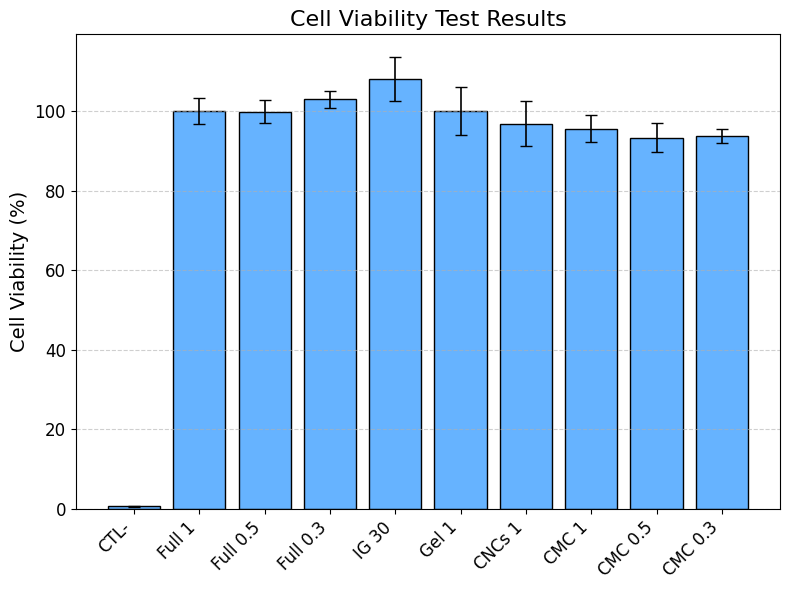

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

# Paste your tab-delimited Excel data below (from 'CTL-' to last row with average and std dev)
data = """
Label	Average	St dev
CTL-	0.6	0.1
Full 1	100.0	3.3
Full 0.5	99.8	2.9
Full 0.3	102.9	2.2
IG 30	108.1	5.5
Gel 1	100.0	6.0
CNCs 1	96.8	5.7
CMC 1	95.6	3.3
CMC 0.5	93.3	3.6
CMC 0.3	93.8	1.8
"""

# Create DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Plotting
x = np.arange(len(df))
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x, df["Average"], yerr=df["St dev"], capsize=4, linewidth=1, error_kw=dict(linewidth=1.2), color='#66b3ff', edgecolor='black')

# Aesthetic formatting
ax.set_ylabel('Cell Viability (%)', fontsize=14)
ax.set_title('Cell Viability Test Results', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(df["Label"], rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

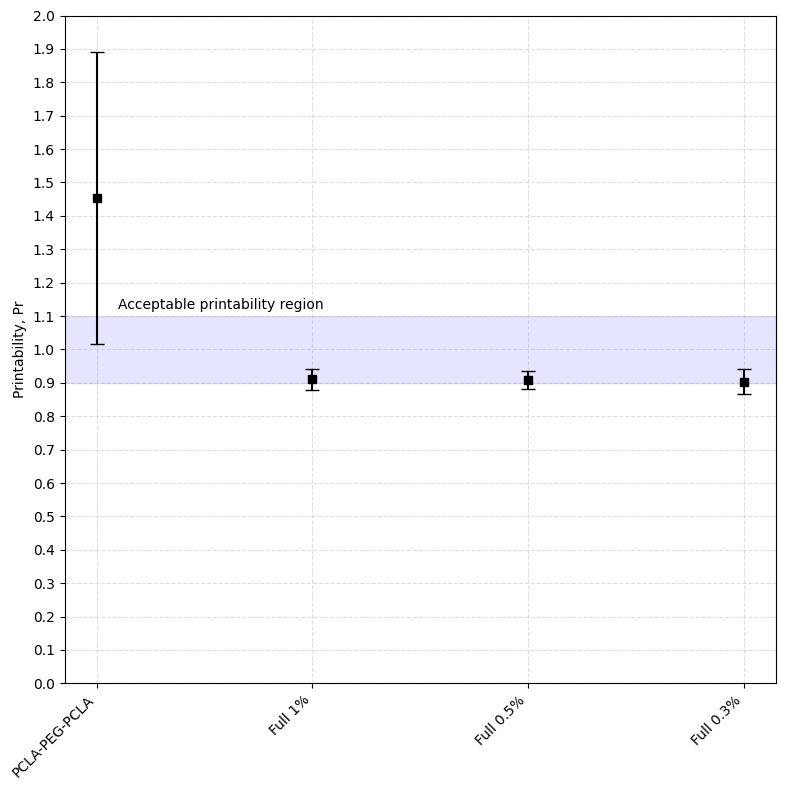

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
samples = ['PCLA-PEG-PCLA', 'Full 1%', 'Full 0.5%', 'Full 0.3%']
avg_pr = [1.45360396, 0.910966839, 0.908903847, 0.90379167]
std_dev = [0.436764075, 0.031912063, 0.027406119, 0.037575091]

x = np.arange(len(samples))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.errorbar(x, avg_pr, yerr=std_dev, fmt='s', capsize=5, color='black', ecolor='black')

# Acceptable printability region (between 0.9 and 1.1)
ax.axhspan(0.9, 1.1, color='blue', alpha=0.1)
ax.text(0.1, 1.12, 'Acceptable printability region', fontsize=10)

# Aesthetics
ax.set_xticks(x)
ax.set_xticklabels(samples, rotation=45, ha='right')
ax.set_ylabel('Printability, Pr')
ax.set_ylim(0, 2)
ax.set_yticks(np.arange(0, 2.1, 0.1))
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


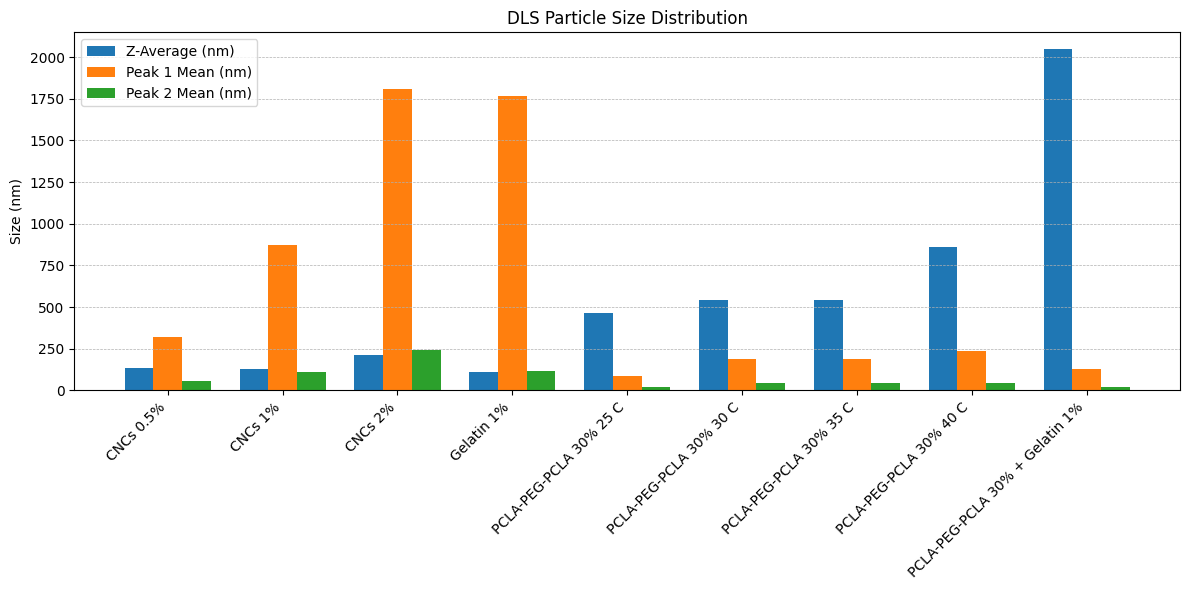

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "Sample": [
        "CNCs 0.5%", "CNCs 1%", "CNCs 2%", "Gelatin 1%", "PCLA-PEG-PCLA 30% 25 C",
        "PCLA-PEG-PCLA 30% 30 C", "PCLA-PEG-PCLA 30% 35 C", "PCLA-PEG-PCLA 30% 40 C", "PCLA-PEG-PCLA 30% + Gelatin 1%"
    ],
    "Z-Average (nm)": [
        133.531, 127.145, 213.87, 107.997, 466.829,
        543.645, 543.645, 860.36, 2047.056
    ],
    "Peak 1 Mean (nm)": [
        322.994, 875.317, 1811.833, 1764.61, 84.422,
        190.802, 190.802, 233.427, 127.835
    ],
    "Peak 2 Mean (nm)": [
        54.022, 112.531, 242.187, 116.689, 19.118,
        42.064, 42.064, 45.105, 17.253
    ]
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
x = range(len(df))

ax.bar([i - bar_width for i in x], df["Z-Average (nm)"], width=bar_width, label="Z-Average (nm)")  # yellow
ax.bar(x, df["Peak 1 Mean (nm)"], width=bar_width, label="Peak 1 Mean (nm)")  # orange
ax.bar([i + bar_width for i in x], df["Peak 2 Mean (nm)"], width=bar_width, label="Peak 2 Mean (nm)")  # pink

ax.set_xticks(x)
ax.set_xticklabels(df["Sample"], rotation=45, ha="right")
ax.set_ylabel("Size (nm)")
ax.set_title("DLS Particle Size Distribution")
ax.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", linewidth=0.5)

plt.show()

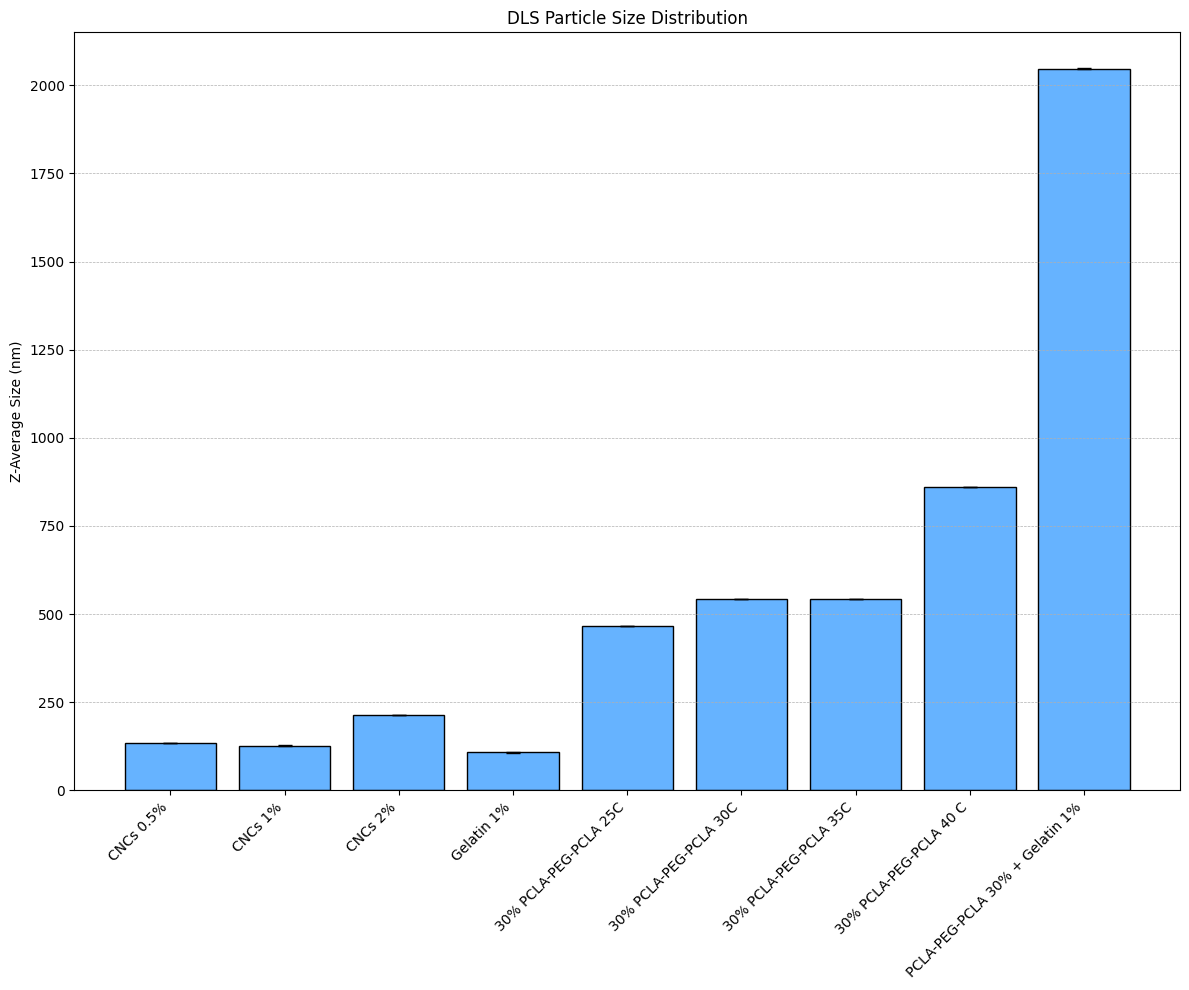

In [ ]:
import matplotlib.pyplot as plt

# Sample names
samples = [
    "CNCs 0.5%", "CNCs 1%", "CNCs 2%", "Gelatin 1%",
    "30% PCLA-PEG-PCLA 25C", "30% PCLA-PEG-PCLA 30C", "30% PCLA-PEG-PCLA 35C",
    "30% PCLA-PEG-PCLA 40 C", "PCLA-PEG-PCLA 30% + Gelatin 1%"
]

# Z-Average (nm)
sizes = [
    133.531, 127.145, 213.87, 107.997,
    466.829, 543.645, 543.645,
    860.36, 2047.056
]

# PI as error bars
errors = [
    0.594, 1, 1, 1,
    0.486, 0.531, 0.531,
    0.584, 1
]

# Plotting
plt.figure(figsize=(12, 10))
plt.bar(samples, sizes, yerr=errors, linewidth=1, error_kw=dict(linewidth=1.2), capsize=5, color='#66b3ff', edgecolor='black')
plt.ylabel('Z-Average Size (nm)')
plt.xticks(rotation=45, ha='right')
plt.title('DLS Particle Size Distribution')
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

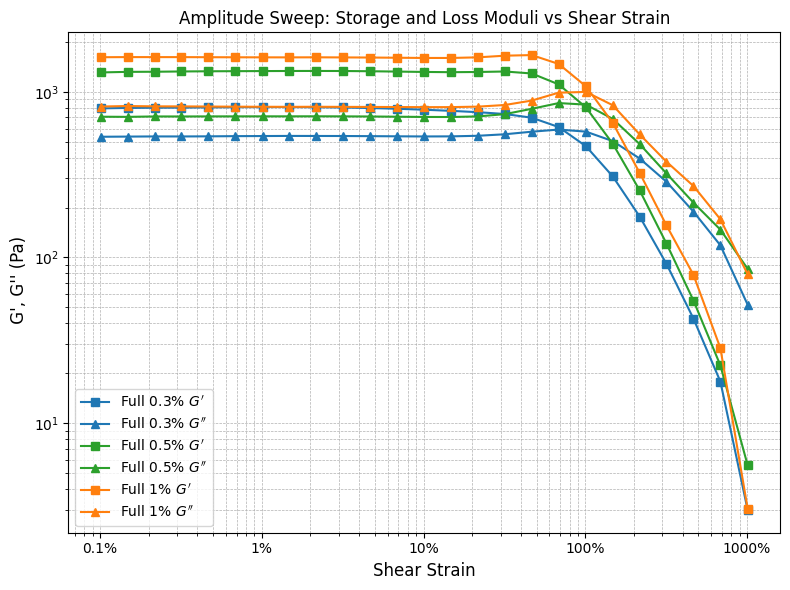

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.00101	0.96241	794.12	535.15	0.674	20	0.27939	TruStrain™	42.11
2	0.00148	1.4195	798.83	536.38	0.671	20	0.41208	WMa,TruStrain™	102.4
3	0.00217	2.0896	801.38	537.59	0.671	20	0.60661	WMa,TruStrain™	162.6
4	0.00318	3.0695	802.41	537.42	0.67	20	0.8911	WMa,TruStrain™	222.9
5	0.00467	4.5175	804.98	538.25	0.669	20	1.3115	WMa,TruStrain™	283.2
6	0.00685	6.649	807.2	539.72	0.669	20	1.9302	WMa,TruStrain™	343.5
7	0.0101	9.7775	808.85	540.5	0.668	20	2.8384	WMa,TruStrain™	403.7
8	0.0148	14.361	809.01	541.39	0.669	20	4.169	WMa,TruStrain™	464
9	0.0217	21.035	806.77	541.07	0.671	20	6.1065	WMa,TruStrain™	524.3
10	0.0318	30.792	803.86	540.72	0.673	20	8.939	WMa,TruStrain™	584.5
11	0.0467	44.942	797.99	539.71	0.676	20	13.047	WMa,TruStrain™	644.8
12	0.0685	65.463	789.94	538.5	0.682	20	19.004	WMa,TruStrain™	705.1
13	0.101	95.137	779.24	537.37	0.69	20	27.618	WMa,TruStrain™	765.3
14	0.148	138.25	767.22	538.1	0.701	20	40.134	WMa,TruStrain™	825.6
15	0.217	200.99	753.13	542.53	0.72	20	58.348	WMa,TruStrain™	885.9
16	0.318	292.33	734.25	553.96	0.754	20	84.866	WMa,TruStrain™	946.2
17	0.467	421.43	697.49	574.1	0.823	20	122.34	WMa,TruStrain™	1006
18	0.685	583.04	612.55	591.43	0.966	20	169.26	WMa,TruStrain™	1067
19	1.01	745.77	469.28	574.76	1.225	20	216.5	WMa,TruStrain™	1127
20	1.48	871.2	308.22	503.74	1.634	20	252.91	WMa,TruStrain™	1187
21	2.17	938.14	176.58	395.64	2.241	20	272.35	WMa,TruStrain™	1248
22	3.18	954.66	91.351	286.14	3.132	20	277.14	WMa,TruStrain™	1308
23	4.67	903.71	42.678	188.95	4.427	20	262.35	WMa,TruStrain™	1368
24	6.85	819.26	17.796	118.31	6.648	20	237.83	WMa,TruStrain™	1428
25	10.1	521.53	2.9857	51.805	17.351	20	151.4	WMa,TruStrain™	1489
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.00101	1.495	1308.7	707.13	0.54	20	0.43399	TruStrain™	42.12
2	0.00148	2.2071	1319.2	705.68	0.535	20	0.64073	WMa,TruStrain™	102.4
3	0.00217	3.2475	1321.2	709.71	0.537	20	0.94277	WMa,TruStrain™	162.7
4	0.00318	4.7812	1326.5	709.43	0.535	20	1.388	WMa,TruStrain™	222.9
5	0.00467	7.0337	1329.9	710.23	0.534	20	2.0419	WMa,TruStrain™	283.2
6	0.00685	10.337	1331.9	710.61	0.534	20	3.0009	WMa,TruStrain™	343.5
7	0.0101	15.19	1333.8	710.86	0.533	20	4.4098	WMa,TruStrain™	403.7
8	0.0148	22.314	1335.2	710.78	0.532	20	6.4779	WMa,TruStrain™	464
9	0.0217	32.776	1336.1	711.3	0.532	20	9.515	WMa,TruStrain™	524.3
10	0.0318	48.063	1334.9	710.51	0.532	20	13.953	WMa,TruStrain™	584.5
11	0.0467	70.348	1330.7	709.29	0.533	20	20.422	WMa,TruStrain™	644.8
12	0.0685	102.8	1324.4	707.17	0.534	20	29.845	WMa,TruStrain™	705.1
13	0.101	150.18	1317.6	704.78	0.535	20	43.598	WMa,TruStrain™	765.4
14	0.148	219.83	1313.2	704.23	0.536	20	63.816	WMa,TruStrain™	825.6
15	0.217	323.96	1316.8	710.03	0.539	20	94.046	WMa,TruStrain™	885.9
16	0.318	481.54	1326	732.9	0.553	20	139.79	WMa,TruStrain™	946.2
17	0.467	705.46	1289.9	789.27	0.612	20	204.8	WMa,TruStrain™	1006
18	0.685	958.46	1108.4	854.78	0.771	20	278.24	WMa,TruStrain™	1067
19	1.01	1167.2	805.38	836.63	1.039	20	338.84	WMa,TruStrain™	1127
20	1.48	1239.7	485.57	685.85	1.412	20	359.88	WMa,TruStrain™	1187
21	2.17	1182.7	254.15	483.5	1.902	20	343.35	WMa,TruStrain™	1248
22	3.18	1091.4	121.15	321.3	2.652	20	316.83	WMa,TruStrain™	1308
23	4.67	1030.9	54.891	214.04	3.899	20	299.26	WMa,TruStrain™	1368
24	6.85	1018.8	22.277	147.1	6.603	20	295.75	WMa,TruStrain™	1428
25	10.1	859.26	5.56	85.314	15.344	20	249.45	WMa,TruStrain™	1489
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.00101	1.8195	1616.8	814.71	0.504	20	0.52821	TruStrain™	42.12
2	0.00148	2.6786	1619.9	820.24	0.506	20	0.77762	WMa,TruStrain™	102.4
3	0.00217	3.9273	1619.4	816.68	0.504	20	1.1401	WMa,TruStrain™	162.7
4	0.00318	5.7633	1619.2	816.16	0.504	20	1.6731	WMa,TruStrain™	222.9
5	0.00467	8.4479	1617.3	814.51	0.504	20	2.4524	WMa,TruStrain™	283.2
6	0.00685	12.383	1615.5	812.84	0.503	20	3.5949	WMa,TruStrain™	343.5
7	0.0101	18.161	1614.3	811.94	0.503	20	5.2723	WMa,TruStrain™	403.7
8	0.0148	26.642	1613.5	811.1	0.503	20	7.7341	WMa,TruStrain™	464
9	0.0217	39.143	1615	811.99	0.503	20	11.363	WMa,TruStrain™	524.3
10	0.0318	57.372	1612.7	810.86	0.503	20	16.655	WMa,TruStrain™	584.6
11	0.0467	84.081	1610	810.17	0.503	20	24.409	WMa,TruStrain™	644.8
12	0.0685	123.1	1605.5	808.92	0.504	20	35.736	WMa,TruStrain™	705.1
13	0.101	180.2	1600.6	807.7	0.505	20	52.311	WMa,TruStrain™	765.4
14	0.148	264.5	1600.5	808.04	0.505	20	76.786	WMa,TruStrain™	825.6
15	0.217	391.43	1614.3	813.46	0.504	20	113.63	WMa,TruStrain™	885.9
16	0.318	587.82	1651.7	832.16	0.504	20	170.65	WMa,TruStrain™	946.2
17	0.467	879.99	1665.9	885	0.531	20	255.47	WMa,TruStrain™	1006
18	0.685	1214.2	1472.6	987.7	0.671	20	352.48	WMa,TruStrain™	1067
19	1.01	1476.9	1078.5	998.05	0.925	20	428.76	WMa,TruStrain™	1127
20	1.48	1553.7	648.84	829.59	1.279	20	451.03	WMa,TruStrain™	1187
21	2.17	1388.2	324.01	553.23	1.707	20	403.01	WMa,TruStrain™	1248
22	3.18	1300.3	155.95	378.23	2.425	20	377.49	WMa,TruStrain™	1308
23	4.67	1310.5	78.406	269.75	3.44	20	380.44	WMa,TruStrain™	1368
24	6.85	1179.5	28.334	169.9	5.996	20	342.4	WMa,TruStrain™	1428
25	10.1	795.51	3.0398	79.091	26.019	20	230.94	WMa,TruStrain™	1489
"""


def clean_and_extract_amplitude(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Shear Strain', 'Storage Modulus', 'Loss Modulus']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Shear Strain', 'Storage Modulus', 'Loss Modulus'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Shear Strain'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract_amplitude(raw_data1, "Full 0.3%"),
    clean_and_extract_amplitude(raw_data2, "Full 0.5%"),
    clean_and_extract_amplitude(raw_data3, "Full 1%"),
]

plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

for i, (strain, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    plt.plot(strain, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(strain, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Shear Strain", fontsize=12)
plt.ylabel(r" G', G'' (Pa)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks([0.001, 0.01, 0.1, 1, 10], ['0.1%', '1%', '10%', '100%', '1000%'])
plt.legend()
plt.title("Amplitude Sweep: Storage and Loss Moduli vs Shear Strain")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

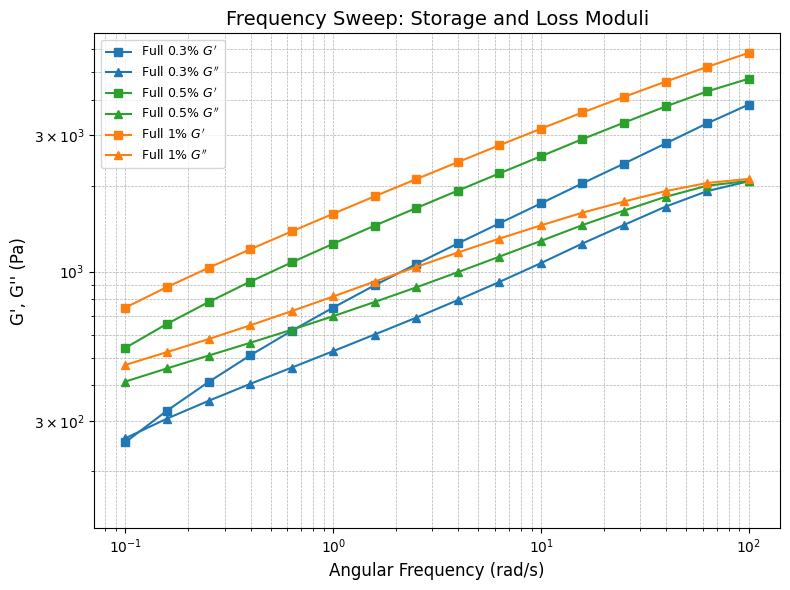

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity	Angular Frequency

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]	[rad/s]
1	0.01	43.827	3847	2073.3	0.539	20	12.723	TruStrain™	4.673		100
2	0.0101	38.432	3307.4	1914.6	0.579	20	11.157	TruStrain™	10.42		63.1
3	0.0101	32.981	2812.3	1689.8	0.601	20	9.5744	TruStrain™	16.27		39.8
4	0.0101	28.142	2390.7	1457.6	0.61	20	8.1696	TruStrain™	22.51		25.1
5	0.0101	24.047	2037.6	1254.2	0.616	20	6.981	TruStrain™	29.79		15.8
6	0.0101	20.494	1734.7	1071.8	0.618	20	5.9494	TruStrain™	38.66		10
7	0.0101	17.491	1476.9	920.69	0.623	20	5.0778	TruStrain™	49.54		6.31
8	0.0101	14.94	1255.8	795.46	0.633	20	4.337	TruStrain™	62.96		3.98
9	0.0101	12.744	1063.7	690.29	0.649	20	3.6998	TruStrain™	81.13		2.51
10	0.0101	10.843	895.16	602.21	0.673	20	3.1478	TruStrain™	108.1		1.58
11	0.0101	9.202	748.83	526.84	0.704	20	2.6714	TruStrain™	148.2		1
12	0.0101	7.7749	620.93	461.41	0.743	20	2.2571	TruStrain™	207.9		0.631
13	0.0101	6.5342	508.95	404.54	0.795	20	1.8969	TruStrain™	296.7		0.398
14	0.0101	5.443	410.81	352.89	0.859	20	1.5801	WMa,TruStrain™	411.6		0.251
15	0.0101	4.4882	325.65	305.57	0.938	20	1.3029	WMa,TruStrain™	557.9		0.158
16	0.0101	3.6546	253	261.19	1.032	20	1.061	WMa,TruStrain™	747		0.1
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity	Angular Frequency

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]	[rad/s]
1	0.01	51.891	4738.5	2078	0.439	20	15.064	TruStrain™	4.663		100
2	0.0101	47.5	4278.7	2000.1	0.467	20	13.789	TruStrain™	10.42		63.1
3	0.0101	42.288	3788.5	1828.5	0.483	20	12.276	TruStrain™	16.27		39.8
4	0.0101	37.252	3325.3	1636.7	0.492	20	10.814	TruStrain™	22.51		25.1
5	0.0101	32.695	2909.5	1455.3	0.5	19.99	9.4914	TruStrain™	29.79		15.8
6	0.0101	28.56	2536.2	1281.8	0.505	20	8.291	TruStrain™	38.66		10
7	0.0101	24.932	2208.9	1129.1	0.511	20	7.2379	TruStrain™	49.54		6.31
8	0.0101	21.757	1922.1	996	0.518	20	6.3162	TruStrain™	62.96		3.98
9	0.0101	18.981	1670.4	881.21	0.528	20	5.5102	TruStrain™	81.13		2.51
10	0.0101	16.55	1448.7	782.9	0.54	20	4.8046	TruStrain™	108.1		1.58
11	0.0101	14.413	1252.5	698.52	0.558	20	4.1842	TruStrain™	148.2		1
12	0.0101	12.528	1077.8	626.1	0.581	20	3.6368	TruStrain™	207.9		0.631
13	0.0101	10.862	922.33	563.4	0.611	20	3.1534	TruStrain™	296.7		0.398
14	0.0101	9.3766	782.38	508.23	0.65	20	2.7221	WMa,TruStrain™	411.6		0.251
15	0.0101	8.04	655.76	458.18	0.699	20	2.334	WMa,TruStrain™	557.9		0.158
16	0.0101	6.8394	541.34	412.37	0.762	20	1.9855	WMa,TruStrain™	747		0.1
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity	Angular Frequency

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]	[rad/s]
1	0.01	62.267	5837.8	2111.9	0.362	20	18.076	TruStrain™	4.72		100
2	0.0101	56.317	5213.5	2044.3	0.392	20	16.349	TruStrain™	10.51		63.1
3	0.0101	50.352	4628.7	1914.5	0.414	19.99	14.617	TruStrain™	16.21		39.8
4	0.0101	44.777	4092.6	1760.7	0.43	20	12.999	TruStrain™	22.45		25.1
5	0.0101	39.701	3607.9	1608.4	0.446	19.99	11.525	TruStrain™	29.72		15.8
6	0.0101	35.016	3166.7	1452.6	0.459	20	10.165	TruStrain™	38.6		10
7	0.0101	30.788	2771.1	1305.9	0.471	20	8.938	TruStrain™	49.47		6.31
8	0.0101	26.998	2419.4	1167.3	0.482	20	7.8375	TruStrain™	62.9		3.98
9	0.0101	23.625	2108.5	1039	0.493	20	6.8584	TruStrain™	81.07		2.51
10	0.0101	20.645	1835.1	922.87	0.503	20	5.9932	TruStrain™	108.1		1.58
11	0.0101	18.02	1595.1	818.75	0.513	20	5.2312	TruStrain™	148.2		1
12	0.0101	15.711	1383.5	727.63	0.526	20	4.5609	TruStrain™	207.8		0.631
13	0.0101	13.684	1197.2	648.51	0.542	20	3.9726	TruStrain™	296.6		0.398
14	0.0101	11.892	1031	580.58	0.563	20	3.4523	WMa,TruStrain™	411.6		0.251
15	0.0101	10.308	882.55	522.53	0.592	20	2.9925	WMa,TruStrain™	557.8		0.158
16	0.0101	8.8931	748.72	471.58	0.63	20	2.5817	WMa,TruStrain™	747		0.1
"""


def clean_and_extract_frequency(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Angular Frequency', 'Storage Modulus', 'Loss Modulus']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Angular Frequency', 'Storage Modulus', 'Loss Modulus'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Angular Frequency'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract_frequency(raw_data1, "Full 0.3%"),
    clean_and_extract_frequency(raw_data2, "Full 0.5%"),
    clean_and_extract_frequency(raw_data3, "Full 1%"),
]

plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

for i, (freq, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    plt.plot(freq, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(freq, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Angular Frequency (rad/s)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.yticks([1e2, 3e2, 1e3, 3e3], [r'$10^2$', r'$3 \times 10^2$', r'$10^3$', r'$3 \times 10^3$'])
plt.legend(fontsize=9)
plt.title("Frequency Sweep: Storage and Loss Moduli", fontsize=14)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
# Compute min y value from all datasets
min_y = min([min(min(Gp), min(Gpp)) for _, Gp, Gpp, _ in datasets])
plt.ylim(bottom=min_y * 0.5)  # Add 50% space below
plt.show()

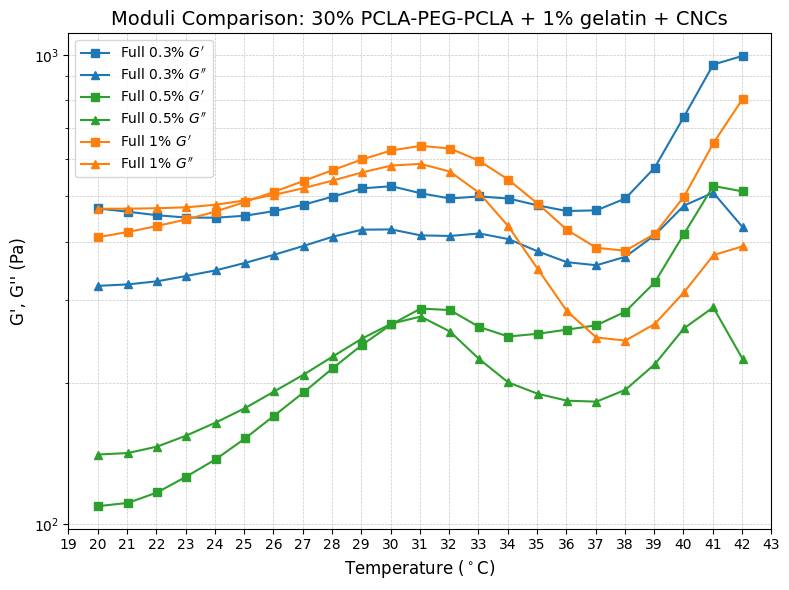

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	5.731	470.71	321.86	0.684	20	1.6637	TruStrain™
2	0.0101	5.6834	463.3	324.24	0.7	21.03	1.6499	TruStrain™
3	0.0101	5.6466	455.3	329.18	0.723	22.03	1.6392	TruStrain™
4	0.0101	5.6572	450.18	337.91	0.751	23.03	1.6423	TruStrain™
5	0.0101	5.712	449.83	347.37	0.772	24.03	1.6582	TruStrain™
6	0.0101	5.827	454.24	360.29	0.793	25.03	1.6916	TruStrain™
7	0.0101	6.0022	464.75	375.06	0.807	26.03	1.7425	TruStrain™
8	0.0101	6.2223	479.47	391.68	0.817	27.03	1.8064	TruStrain™
9	0.0101	6.4907	499.11	409.83	0.821	28.03	1.8843	TruStrain™
10	0.0101	6.7415	519.61	424.19	0.816	29.03	1.9571	TruStrain™
11	0.0101	6.7876	525.12	424.67	0.809	30.03	1.9705	TruStrain™
12	0.0101	6.5706	507.24	412.45	0.813	31.03	1.9075	TruStrain™
13	0.0101	6.4639	494.45	411.29	0.832	32.03	1.8765	TruStrain™
14	0.0101	6.5345	499.37	416.36	0.834	33.03	1.897	TruStrain™
15	0.0101	6.4217	494.27	404.91	0.819	34.03	1.8642	TruStrain™
16	0.0101	6.1435	477.83	381.22	0.798	35.03	1.7835	TruStrain™
17	0.0101	5.9193	464.85	361.65	0.778	36.02	1.7184	TruStrain™
18	0.0101	5.8978	466.4	356.13	0.764	37.03	1.7122	TruStrain™
19	0.0101	6.2151	494.42	371.42	0.751	38.02	1.8043	TruStrain™
20	0.0101	7.1158	575.21	412.81	0.718	39.02	2.0657	TruStrain™
21	0.0101	8.841	738.85	477.4	0.646	40.02	2.5666	TruStrain™
22	0.0101	10.871	954.58	508.73	0.533	41.02	3.156	TruStrain™
23	0.0101	10.899	996.05	428.89	0.431	42.03	3.1641	TruStrain™
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	1.7884	109.08	140.59	1.289	20	0.51918	TruStrain™
2	0.0101	1.8076	110.87	141.62	1.277	21.03	0.52476	TruStrain™
3	0.0101	1.8799	116.7	146.19	1.253	22.03	0.54575	TruStrain™
4	0.0101	2.0038	126.21	154.34	1.223	23.03	0.58171	TruStrain™
5	0.0101	2.1539	137.35	164.51	1.198	24.03	0.62527	TruStrain™
6	0.0101	2.3423	152.11	176.58	1.161	25.03	0.67999	TruStrain™
7	0.0101	2.5769	170.26	191.71	1.126	26.03	0.74809	TruStrain™
8	0.0101	2.8373	190.74	208.12	1.091	27.03	0.82367	TruStrain™
9	0.0101	3.1462	214.91	227.62	1.059	28.03	0.91334	TruStrain™
10	0.0101	3.4797	240.98	248.6	1.032	29.03	1.0102	TruStrain™
11	0.0101	3.7938	266.43	267.4	1.004	30.03	1.1013	TruStrain™
12	0.0101	4.015	288.01	276.85	0.961	31.03	1.1656	TruStrain™
13	0.0101	3.8638	285.75	257.19	0.9	32.03	1.1217	TruStrain™
14	0.0101	3.4755	262.97	224.56	0.854	33.03	1.009	TruStrain™
15	0.0101	3.2278	251.01	200.35	0.798	34.02	0.93704	TruStrain™
16	0.0101	3.1879	254.4	189.45	0.745	35.03	0.92546	TruStrain™
17	0.0101	3.1933	259.64	183.14	0.705	36.03	0.92703	TruStrain™
18	0.0101	3.2349	265.28	182.29	0.687	37.03	0.93912	TruStrain™
19	0.0101	3.4492	283.64	193.21	0.681	38.02	1.0013	TruStrain™
20	0.0101	3.9575	327.25	218.99	0.669	39.02	1.1489	TruStrain™
21	0.0101	4.9326	415.44	261.31	0.629	40.02	1.432	TruStrain™
22	0.0101	6.0331	525.8	289.6	0.551	41.02	1.7514	TruStrain™
23	0.0101	5.6195	511.91	224.88	0.439	42.02	1.6314	TruStrain™
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	6.2603	408.74	470.03	1.15	20	1.8224	TruStrain™
2	0.0101	6.3323	419.4	470.19	1.121	21.03	1.8434	TruStrain™
3	0.0101	6.4249	431.92	471.29	1.091	22.03	1.8704	TruStrain™
4	0.0101	6.5378	446.09	473.45	1.061	23.03	1.9032	TruStrain™
5	0.0101	6.7039	463.75	479.44	1.034	24.03	1.9516	TruStrain™
6	0.0101	6.9342	486.01	489.71	1.008	25.03	2.0186	TruStrain™
7	0.0101	7.209	511	503.37	0.985	26.03	2.0986	TruStrain™
8	0.0101	7.5278	538.92	520.16	0.965	27.03	2.1914	TruStrain™
9	0.0101	7.8805	568.48	540.04	0.95	28.03	2.2941	TruStrain™
10	0.0101	8.2551	599.01	562	0.938	29.03	2.4031	TruStrain™
11	0.0101	8.5851	625.98	581.22	0.928	30.03	2.4992	TruStrain™
12	0.0101	8.7228	640.22	585.98	0.915	31.03	2.5393	TruStrain™
13	0.0101	8.5131	631.92	564.06	0.893	32.03	2.4782	TruStrain™
14	0.0101	7.8675	595.1	508.56	0.855	33.02	2.2903	TruStrain™
15	0.0101	6.966	542.53	431.33	0.795	34.02	2.0279	TruStrain™
16	0.0101	5.9804	481.66	349.39	0.725	35.03	1.7409	TruStrain™
17	0.0101	5.1251	423.55	283.98	0.67	36.03	1.492	TruStrain™
18	0.0101	4.6372	387.95	249.76	0.644	37.03	1.3499	TruStrain™
19	0.0101	4.5714	382.53	246.08	0.643	38.02	1.3308	TruStrain™
20	0.0101	4.9617	415.32	266.9	0.643	39.02	1.4444	TruStrain™
21	0.0101	5.9121	498.79	311.84	0.625	40.02	1.7211	TruStrain™
22	0.0101	7.5366	649.64	374.54	0.577	41.03	2.194	TruStrain™
23	0.0101	8.9996	805.7	390.75	0.485	42.02	2.6199	TruStrain™
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Temperature']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Temperature'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Temperature'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "Full 0.3%"),
    clean_and_extract(raw_data2, "Full 0.5%"),
    clean_and_extract(raw_data3, "Full 1%"),
    # Add more like: clean_and_extract(raw_data3, "Sample C")
]


# Colors of datasets
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', 'violet']

plt.figure(figsize=(8, 6))

all_temps = []

for i, (temp, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_temps.extend(temp)
    plt.plot(temp, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(temp, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Moduli Comparison: 30% PCLA-PEG-PCLA + 1% gelatin + CNCs", fontsize=14)

temp_min = int(np.floor(min(all_temps)))
temp_max = int(np.ceil(max(all_temps)))

plt.xlim(temp_min, temp_max)
plt.xticks(np.arange(temp_min - 1, temp_max + 1, 1))  # 1 degree steps on x-axis

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(fontsize=10) #for legend inside the plot
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # for legend outside the plot
#plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space on the right
plt.show()

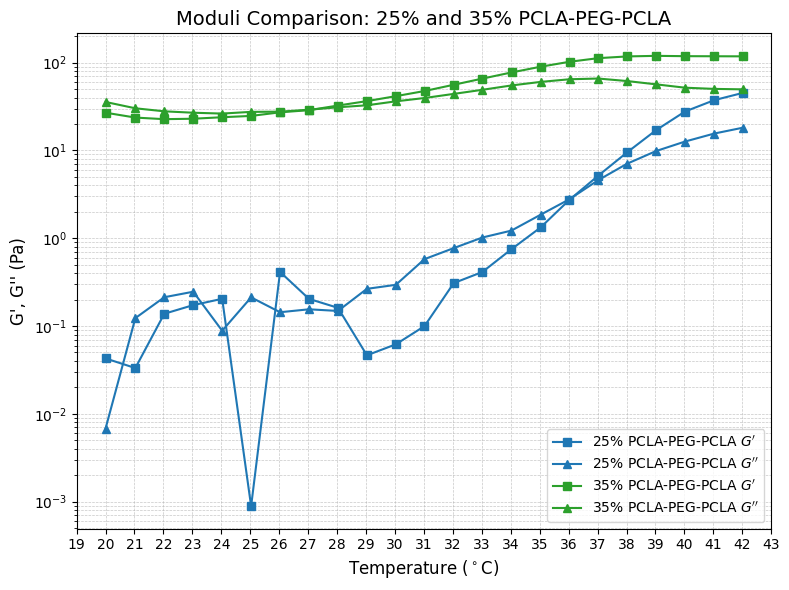

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	0.00043496	0.042744	0.006781	0.159	20	0.00012627	M- ,ME-,MV-,TruStrain™
2	0.0101	0.0012807	0.03322	0.12302	3.703	21.03	0.00037178	M- ,ME-,MV-,TruStrain™
3	0.0101	0.0025489	0.13794	0.21282	1.543	22.03	0.00073996	ME-,MV-,TruStrain™
4	0.0101	0.0030217	0.17304	0.24586	1.421	23.03	0.0008772	ME-,MV-,TruStrain™
5	0.0101	0.0022361	0.20419	0.088374	0.433	24.03	0.00064915	ME-,MV-,TruStrain™
6	0.0101	0.0021299	0.00088648	0.21192	239.06	25.03	0.00061832	ME-,MV-,TruStrain™
7	0.0101	0.0043981	0.41337	0.14362	0.347	26.03	0.0012768	ME-,MV-,TruStrain™
8	0.0101	0.0025725	0.20365	0.15507	0.761	27.03	0.00074682	ME-,MV-,taD,TruStrain™
9	0.0101	0.0022025	0.16116	0.1485	0.921	28.03	0.00063938	ME-,MV-,TruStrain™
10	0.0101	0.0027059	0.046403	0.2652	5.715	29.03	0.00078553	ME-,MV-,TruStrain™
11	0.0101	0.0030258	0.061879	0.29463	4.761	30.03	0.00087839	TruStrain™
12	0.0101	0.005895	0.099757	0.578	5.794	31.02	0.0017113	ME-,MV-,TruStrain™
13	0.0101	0.0083529	0.30827	0.77182	2.504	32.03	0.0024249	TruStrain™
14	0.0101	0.01105	0.4127	1.0191	2.469	33.02	0.0032079	TruStrain™
15	0.0101	0.014389	0.74812	1.2207	1.632	34.02	0.0041772	TruStrain™
16	0.0101	0.022884	1.3253	1.8515	1.397	35.03	0.0066434	TruStrain™
17	0.0101	0.039076	2.7257	2.7725	1.017	36.02	0.011344	TruStrain™
18	0.0101	0.06967	5.1816	4.6049	0.889	37.03	0.020225	TruStrain™
19	0.0101	0.11905	9.5119	7.0601	0.742	38.02	0.034562	TruStrain™
20	0.0101	0.19753	17.013	9.8411	0.578	39.02	0.057344	TruStrain™
21	0.0101	0.30639	27.75	12.622	0.455	40.02	0.088947	TruStrain™
22	0.0101	0.40702	37.385	15.571	0.416	41.03	0.11816	TruStrain™
23	0.0101	0.48989	45.235	18.158	0.401	42.02	0.14222	TruStrain™
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	0.44898	26.914	35.655	1.325	20	0.13034	TruStrain™
2	0.0101	0.38574	23.675	30.208	1.276	21.03	0.11198	TruStrain™
3	0.0101	0.36151	22.708	27.896	1.228	22.03	0.10495	TruStrain™
4	0.0101	0.35537	22.965	26.886	1.171	23.03	0.10317	TruStrain™
5	0.0101	0.35708	23.894	26.294	1.1	24.03	0.10366	TruStrain™
6	0.0101	0.37171	24.728	27.502	1.112	25.03	0.10791	TruStrain™
7	0.0101	0.38955	27.174	27.638	1.017	26.03	0.11309	TruStrain™
8	0.0101	0.41124	28.763	29.103	1.012	27.03	0.11938	TruStrain™
9	0.0101	0.45119	32.459	31.012	0.955	28.03	0.13098	TruStrain™
10	0.0101	0.49196	36.444	32.678	0.897	29.03	0.14282	TruStrain™
11	0.0101	0.55394	41.521	36.246	0.873	30.03	0.16081	TruStrain™
12	0.0101	0.62191	47.559	39.589	0.832	31.03	0.18054	TruStrain™
13	0.0101	0.71601	55.986	44.057	0.787	32.03	0.20786	TruStrain™
14	0.0101	0.82486	65.793	49.064	0.746	33.02	0.23946	TruStrain™
15	0.0101	0.95409	77.369	55.006	0.711	34.03	0.27697	TruStrain™
16	0.0101	1.0874	89.817	60.33	0.672	35.03	0.31568	TruStrain™
17	0.0101	1.2164	102.3	64.673	0.632	36.03	0.35312	TruStrain™
18	0.0101	1.31	112.45	65.921	0.586	37.02	0.3803	TruStrain™
19	0.0101	1.3358	117.75	61.658	0.524	38.03	0.38779	TruStrain™
20	0.0101	1.3289	119.5	56.599	0.474	39.02	0.3858	TruStrain™
21	0.0101	1.3	118.51	51.842	0.437	40.02	0.3774	TruStrain™
22	0.0101	1.2912	118.24	50.242	0.425	41.02	0.37483	TruStrain™
23	0.0101	1.2862	117.96	49.628	0.421	42.02	0.37339	TruStrain™
"""



def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Temperature']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Temperature'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Temperature'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "25% PCLA-PEG-PCLA"),
    clean_and_extract(raw_data2, "35% PCLA-PEG-PCLA"),
    # Add more like: clean_and_extract(raw_data3, "Sample C")
]


# Colors of datasets
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', 'violet']

plt.figure(figsize=(8, 6))

all_temps = []

for i, (temp, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_temps.extend(temp)
    plt.plot(temp, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(temp, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Moduli Comparison: 25% and 35% PCLA-PEG-PCLA", fontsize=14)

temp_min = int(np.floor(min(all_temps)))
temp_max = int(np.ceil(max(all_temps)))

plt.xlim(temp_min, temp_max)
plt.xticks(np.arange(temp_min - 1, temp_max + 1, 1))  # 1 degree steps on x-axis

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(fontsize=10) #for legend inside the plot
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # for legend outside the plot
#plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space on the right
plt.show()

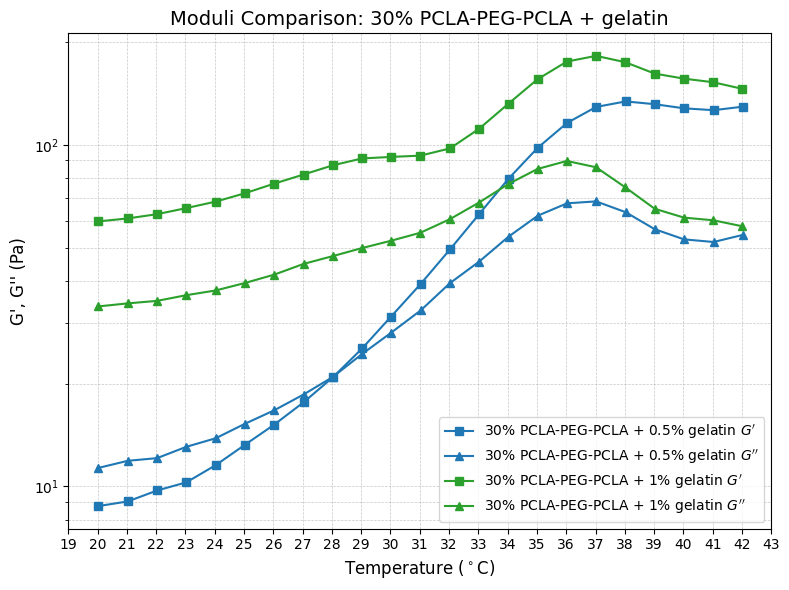

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	0.14383	8.7567	11.32	1.293	20	0.041755	TruStrain™
2	0.0101	0.15013	9.0427	11.89	1.315	21.03	0.043584	TruStrain™
3	0.0101	0.15612	9.7343	12.106	1.244	22.03	0.045324	TruStrain™
4	0.0101	0.16713	10.285	13.067	1.271	23.03	0.048517	TruStrain™
5	0.0101	0.18111	11.543	13.838	1.199	24.03	0.052577	TruStrain™
6	0.0101	0.20307	13.245	15.258	1.152	25.03	0.058951	TruStrain™
7	0.0101	0.22684	15.171	16.71	1.101	26.03	0.065851	TruStrain™
8	0.0101	0.25742	17.629	18.581	1.054	27.03	0.07473	TruStrain™
9	0.0101	0.29689	20.858	20.918	1.003	28.03	0.086188	TruStrain™
10	0.0101	0.35368	25.344	24.415	0.963	29.03	0.10267	TruStrain™
11	0.0101	0.42416	31.419	28.178	0.897	30.02	0.12314	TruStrain™
12	0.0101	0.51291	39.143	32.747	0.837	31.03	0.1489	TruStrain™
13	0.0101	0.63463	49.377	39.36	0.797	32.03	0.18424	TruStrain™
14	0.0101	0.77876	62.703	45.523	0.726	33.03	0.22608	TruStrain™
15	0.0101	0.96551	79.569	53.829	0.677	34.03	0.28029	TruStrain™
16	0.0101	1.1658	98.024	62.01	0.633	35.03	0.33842	TruStrain™
17	0.0101	1.3471	115.86	67.394	0.582	36.03	0.39106	TruStrain™
18	0.0101	1.4668	128.99	68.271	0.529	37.02	0.42581	TruStrain™
19	0.0101	1.4891	133.88	63.474	0.474	38.03	0.43229	TruStrain™
20	0.0101	1.4382	131.42	56.614	0.431	39.02	0.41751	TruStrain™
21	0.0101	1.3899	127.8	52.862	0.414	40.02	0.4035	TruStrain™
22	0.0101	1.3716	126.21	51.925	0.411	41.03	0.39818	TruStrain™
23	0.0101	1.409	129.19	54.446	0.421	42.02	0.40905	TruStrain™
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	0.68805	59.632	33.628	0.564	20	0.19974	TruStrain™
2	0.0101	0.70236	60.864	34.342	0.564	21.03	0.2039	TruStrain™
3	0.0101	0.72073	62.633	34.924	0.558	22.03	0.20923	TruStrain™
4	0.0101	0.75049	65.26	36.294	0.556	23.03	0.21787	TruStrain™
5	0.0101	0.78169	68.161	37.461	0.55	24.03	0.22693	TruStrain™
6	0.0101	0.82589	72.116	39.394	0.546	25.03	0.23976	TruStrain™
7	0.0101	0.87952	76.949	41.676	0.542	26.03	0.25533	TruStrain™
8	0.0101	0.93733	81.802	44.794	0.548	27.03	0.27211	TruStrain™
9	0.0101	0.99535	87.052	47.223	0.542	28.03	0.28895	TruStrain™
10	0.0101	1.0444	91.173	49.855	0.547	29.03	0.30319	TruStrain™
11	0.0101	1.0653	92.138	52.401	0.569	30.03	0.30926	TruStrain™
12	0.0101	1.0865	92.912	55.267	0.595	31.02	0.31542	TruStrain™
13	0.0101	1.1541	97.552	60.571	0.621	32.03	0.33503	TruStrain™
14	0.0101	1.3091	111.25	67.737	0.609	33.02	0.38003	TruStrain™
15	0.0101	1.5344	131.95	76.796	0.582	34.03	0.44545	TruStrain™
16	0.0101	1.7804	155.45	84.943	0.546	35.02	0.51685	TruStrain™
17	0.0101	1.9772	175.12	89.639	0.512	36.02	0.574	TruStrain™
18	0.0101	2.0227	182	85.91	0.472	37.02	0.5872	TruStrain™
19	0.0101	1.9073	174.32	75.009	0.43	38.02	0.5537	TruStrain™
20	0.0101	1.7495	161.5	64.964	0.402	39.02	0.50789	TruStrain™
21	0.0101	1.685	156.09	61.197	0.392	40.02	0.48916	TruStrain™
22	0.0101	1.646	152.34	60.115	0.395	41.02	0.47783	TruStrain™
23	0.0101	1.5755	145.74	57.738	0.396	42.01	0.45737	TruStrain™
"""



def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Temperature']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Temperature'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Temperature'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "30% PCLA-PEG-PCLA + 0.5% gelatin"),
    clean_and_extract(raw_data2, "30% PCLA-PEG-PCLA + 1% gelatin"),
    # Add more like: clean_and_extract(raw_data3, "Sample C")
]


# Colors of datasets
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', 'violet']

plt.figure(figsize=(8, 6))

all_temps = []

for i, (temp, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_temps.extend(temp)
    plt.plot(temp, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(temp, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Moduli Comparison: 30% PCLA-PEG-PCLA + gelatin", fontsize=14)

temp_min = int(np.floor(min(all_temps)))
temp_max = int(np.ceil(max(all_temps)))

plt.xlim(temp_min, temp_max)
plt.xticks(np.arange(temp_min - 1, temp_max + 1, 1))  # 1 degree steps on x-axis

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(fontsize=10, loc='lower right') #for legend inside the plot
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # for legend outside the plot
#plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space on the right
plt.show()

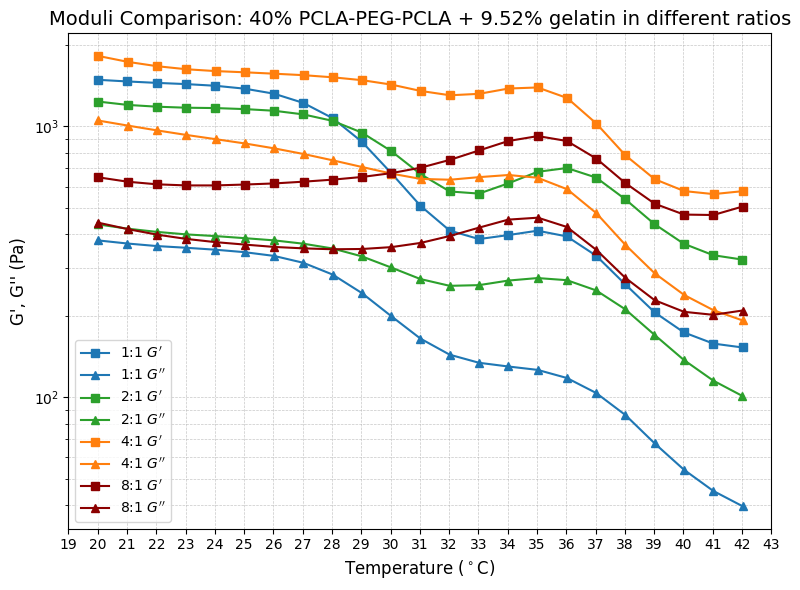

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	15.428	1487.3	379.82	0.255	20	4.4788	TruStrain™
2	0.0101	15.201	1466.6	369.84	0.252	21.01	4.413	TruStrain™
3	0.0101	15.01	1448.9	361.96	0.25	22.01	4.3574	TruStrain™
4	0.0101	14.853	1434.1	356.75	0.249	23.01	4.3117	TruStrain™
5	0.0101	14.639	1413.7	350.86	0.248	24.02	4.2499	TruStrain™
6	0.0101	14.284	1379.1	343.52	0.249	25.02	4.1467	TruStrain™
7	0.0101	13.698	1321.7	332.83	0.252	26.02	3.9766	TruStrain™
8	0.0101	12.681	1222	313.95	0.257	27.02	3.6812	TruStrain™
9	0.0101	11.162	1073.7	284.09	0.265	28.02	3.2404	TruStrain™
10	0.0101	9.1586	878.33	242.69	0.276	29.02	2.6588	TruStrain™
11	0.0101	7.0601	673.51	199.58	0.296	30.02	2.0496	TruStrain™
12	0.0101	5.3843	509.74	164.8	0.323	31.02	1.5631	TruStrain™
13	0.0101	4.3919	412.67	143.72	0.348	32.02	1.275	TruStrain™
14	0.0101	4.0889	384.07	134.18	0.349	33.02	1.187	TruStrain™
15	0.0101	4.2019	397.36	130.01	0.327	34.02	1.2198	TruStrain™
16	0.0101	4.3345	412.36	126.32	0.306	35.02	1.2583	TruStrain™
17	0.0101	4.1223	392.85	117.92	0.3	36.02	1.1967	TruStrain™
18	0.0101	3.51	333.45	103.8	0.311	37.02	1.019	TruStrain™
19	0.0101	2.7637	261.18	86.041	0.329	38.02	0.80232	TruStrain™
20	0.0101	2.1781	205.91	67.6	0.328	39.02	0.63232	TruStrain™
21	0.0101	1.8277	173.64	54.052	0.311	40.02	0.5306	TruStrain™
22	0.0101	1.6513	157.98	45.143	0.286	41.02	0.47937	TruStrain™
23	0.0101	1.5867	152.82	39.645	0.259	42.02	0.46063	TruStrain™
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	13.175	1236.5	435.21	0.352	20	3.8247	TruStrain™
2	0.0101	12.79	1201.4	419.54	0.349	21.02	3.7129	TruStrain™
3	0.0101	12.581	1183.4	408.23	0.345	22.02	3.6523	TruStrain™
4	0.0101	12.455	1173.1	399.64	0.341	23.02	3.6158	TruStrain™
5	0.0101	12.402	1169.5	393.89	0.337	24.02	3.6005	TruStrain™
6	0.0101	12.284	1159.4	387.02	0.334	25.02	3.5662	TruStrain™
7	0.0101	12.108	1143.3	379.87	0.332	26.02	3.5151	TruStrain™
8	0.0101	11.741	1108.4	369.25	0.333	27.02	3.4086	TruStrain™
9	0.0101	11.13	1049.2	354.56	0.338	28.02	3.2312	TruStrain™
10	0.0101	10.108	949.52	331.53	0.349	29.02	2.9344	TruStrain™
11	0.0101	8.7046	811.86	301.61	0.372	30.02	2.527	TruStrain™
12	0.0101	7.2501	667.54	273.4	0.41	31.02	2.1047	TruStrain™
13	0.0101	6.3405	575.65	258.09	0.448	32.02	1.8407	TruStrain™
14	0.0101	6.2521	565.31	259.61	0.459	33.02	1.815	TruStrain™
15	0.0101	6.7655	616.69	269.89	0.438	34.02	1.9641	TruStrain™
16	0.0101	7.378	680.36	275.72	0.405	35.02	2.1419	TruStrain™
17	0.0101	7.5673	702.55	270.8	0.385	36.02	2.1968	TruStrain™
18	0.0101	6.9722	647.78	248.26	0.383	37.02	2.0241	TruStrain™
19	0.0101	5.8231	539.37	211.59	0.392	38.01	1.6905	TruStrain™
20	0.0101	4.7081	436.4	170.28	0.39	39.01	1.3668	TruStrain™
21	0.0101	3.9605	369.26	137.6	0.373	40.01	1.1498	TruStrain™
22	0.0101	3.559	334.82	115.29	0.344	41.02	1.0332	TruStrain™
23	0.0101	3.3988	322.66	101.25	0.314	42.01	0.98668	TruStrain™
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	21.158	1823.1	1052.6	0.577	20	6.1423	TruStrain™
2	0.0101	20.139	1732	1007.6	0.582	21.03	5.8464	TruStrain™
3	0.0101	19.391	1669.4	967.2	0.579	22.03	5.6292	TruStrain™
4	0.0101	18.836	1626.8	930.51	0.572	23.03	5.4681	TruStrain™
5	0.0101	18.451	1601.4	897.75	0.561	24.03	5.3565	TruStrain™
6	0.0101	18.151	1585.1	865.46	0.546	25.03	5.2693	TruStrain™
7	0.0101	17.821	1566.6	830.54	0.53	26.02	5.1735	TruStrain™
8	0.0101	17.464	1546.9	791.45	0.512	27.03	5.0698	TruStrain™
9	0.0101	17.026	1519	749.85	0.494	28.03	4.9426	TruStrain™
10	0.0101	16.514	1482.4	708.55	0.478	29.03	4.7939	TruStrain™
11	0.0101	15.851	1427.8	669.99	0.469	30.03	4.6016	TruStrain™
12	0.0101	15.042	1352.7	640.4	0.473	31.03	4.3667	TruStrain™
13	0.0101	14.581	1303.9	636.03	0.488	32.03	4.233	TruStrain™
14	0.0101	14.789	1320	650.14	0.493	33.02	4.2932	TruStrain™
15	0.0101	15.392	1381	662.11	0.479	34.03	4.4684	TruStrain™
16	0.0101	15.441	1393.5	646.77	0.464	35.02	4.4825	TruStrain™
17	0.0101	14.099	1274.2	586.68	0.46	36.03	4.0929	TruStrain™
18	0.0101	11.369	1025.1	478.41	0.467	37.03	3.3005	TruStrain™
19	0.0101	8.6818	782.77	365.34	0.467	38.02	2.5204	TruStrain™
20	0.0101	7.0399	638.95	287.02	0.449	39.02	2.0437	TruStrain™
21	0.0101	6.2794	577.43	238.64	0.413	40.03	1.8229	TruStrain™
22	0.0101	6.0371	562.9	209.69	0.373	41.03	1.7526	TruStrain™
23	0.0101	6.1134	577.05	192.36	0.333	42.02	1.7747	TruStrain™
"""

raw_data4 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	7.8966	649.65	441.83	0.68	20	2.2924	TruStrain™
2	0.0101	7.5579	625.2	417.88	0.668	21.03	2.1941	TruStrain™
3	0.0101	7.3383	611.67	398.73	0.652	22.03	2.1303	TruStrain™
4	0.0101	7.2125	605.95	384.48	0.635	23.03	2.0938	TruStrain™
5	0.0101	7.1573	605.96	374.1	0.617	24.03	2.0778	TruStrain™
6	0.0101	7.1571	610.62	366.4	0.6	25.03	2.0777	TruStrain™
7	0.0101	7.1697	616.34	359.21	0.583	26.03	2.0814	TruStrain™
8	0.0101	7.2286	625.6	354.87	0.567	27.03	2.0985	TruStrain™
9	0.0101	7.3112	636.53	352.16	0.553	28.03	2.1225	TruStrain™
10	0.0101	7.4445	651.19	353	0.542	29.03	2.1612	TruStrain™
11	0.0101	7.6628	672.8	358.67	0.533	30.03	2.2245	TruStrain™
12	0.0101	8.0077	704.7	371.76	0.528	31.03	2.3247	TruStrain™
13	0.0101	8.5452	753.22	394.4	0.524	32.03	2.4807	TruStrain™
14	0.0101	9.2352	815.63	423.21	0.519	33.02	2.681	TruStrain™
15	0.0101	9.983	883.92	453.12	0.513	34.02	2.8981	TruStrain™
16	0.0101	10.355	921.62	460.61	0.5	35.03	3.0061	TruStrain™
17	0.0101	9.8633	884.23	425.76	0.482	36.02	2.8634	TruStrain™
18	0.0101	8.4174	760.85	350.08	0.46	37.03	2.4436	TruStrain™
19	0.0101	6.8017	617.9	276.04	0.447	38.02	1.9745	TruStrain™
20	0.0101	5.6956	518.66	228.34	0.44	39.02	1.6534	TruStrain™
21	0.0101	5.1886	472.97	206.93	0.438	40.02	1.5063	TruStrain™
22	0.0101	5.1516	471.22	201.71	0.428	41.02	1.4955	TruStrain™
23	0.0101	5.5058	506.28	209.24	0.413	42.02	1.5983	TruStrain™
"""



def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Temperature']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Temperature'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Temperature'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "1:1"),
    clean_and_extract(raw_data2, "2:1"),
    clean_and_extract(raw_data3, "4:1"),
    clean_and_extract(raw_data4, "8:1"),
    # Add more like: clean_and_extract(raw_data3, "Sample C")
]


# Colors of datasets
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', 'darkred']

plt.figure(figsize=(8, 6))

all_temps = []

for i, (temp, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_temps.extend(temp)
    plt.plot(temp, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(temp, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Moduli Comparison: 40% PCLA-PEG-PCLA + 9.52% gelatin in different ratios", fontsize=14)

temp_min = int(np.floor(min(all_temps)))
temp_max = int(np.ceil(max(all_temps)))

plt.xlim(temp_min, temp_max)
plt.xticks(np.arange(temp_min - 1, temp_max + 1, 1))  # 1 degree steps on x-axis

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(fontsize=10, loc='lower left') #for legend inside the plot
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # for legend outside the plot
#plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space on the right
plt.show()

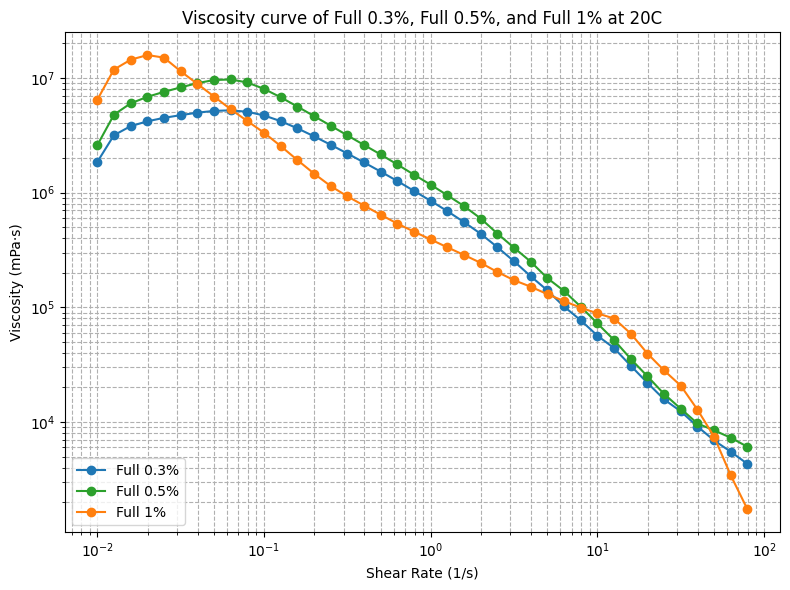

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0249	18.345				20	5.3257	Dy_auto	5.001	1.84E+06
2	0.0813	39.722				20	11.531	Dy_auto	10	3.16E+06
3	0.152	59.98				20	17.413	Dy_auto	15	3.79E+06
4	0.242	83.359				20	24.2	Dy_auto	20	4.18E+06
5	0.354	112.4				20	32.63	Dy_auto	25.01	4.48E+06
6	0.496	149.58				20	43.425	Dy_auto	30.01	4.73E+06
7	0.675	197.55				20	57.35	Dy_auto	35.01	4.97E+06
8	0.901	258.01				20	74.901	Dy_auto	40.03	5.15E+06
9	1.19	328.53				20	95.374	Dy_auto	45.06	5.21E+06
10	1.54	402.2				20	116.76	Dy_auto	50.08	5.06E+06
11	1.99	470.3				20	136.53	Dy_auto	55.09	4.70E+06
12	2.56	527.92				20	153.26	Dy_auto	60.11	4.19E+06
13	3.27	575.51				20	167.07	Dy_auto	65.13	3.63E+06
14	4.17	616.96				20	179.11	Dy_auto	70.15	3.09E+06
15	5.3	655.2				20	190.21	Dy_auto	75.17	2.61E+06
16	6.73	692.34				20	200.99	Dy_auto	80.19	2.19E+06
17	8.52	728.57				20	211.51	Dy_auto	85.21	1.83E+06
18	10.8	763.36				20	221.61	Dy_auto	90.23	1.52E+06
19	13.6	794.93				20	230.77	Dy_auto	95.25	1.26E+06
20	17.2	820.68				20	238.24	Dy_auto	100.3	1.03E+06
21	21.7	846.59				20	245.77	Dy_auto	105.3	8.47E+05
22	27.4	866.29				20	251.49	Dy_auto	110.3	6.88E+05
23	34.5	875.33				20	254.11	Dy_auto	115.3	5.52E+05
24	43.5	872.1				20	253.17	Dy_auto	120.4	4.37E+05
25	54.8	839.07				20	243.58	Dy_auto	125.4	3.34E+05
26	69.1	795.29				20	230.87	Dy_auto	130.4	2.51E+05
27	87.1	741.47				20	215.25	Dy_auto	135.5	1.86E+05
28	110	704.33				20	204.47	Dy_auto	140.5	1.41E+05
29	138	640.72				20	186	Dy_auto	145.5	1.02E+05
30	174	611.5				20	177.52	Dy_auto	150.6	76959
31	219	566.08				20	164.34	Dy_auto	155.6	56588
32	276	554.44				20	160.96	Dy_auto	160.7	44022
33	348	490.14				20	142.29	Dy_auto	165.7	30911
34	439	438.18				20	127.21	Dy_auto	170.8	21949
35	553	395.45				20	114.8	Dy_auto	175.8	15735
36	696	391.99				20	113.8	Dy_auto	180.9	12389
37	877	364.12				20	105.7	Dy_auto	185.9	9140.6
38	1.10E+03	346.36				20	100.55	Dy_auto	191	6906.7
39	1.39E+03	347.67				20	100.93	Dy_auto	196.1	5506.6
40	1.75E+03	342.91				20	99.549	Dy_auto	201.1	4313.9
41	2.21E+03	374.19				20	108.63	Dy_auto	206.2	3739.2
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0249	25.738				19.99	7.4718	Dy_auto	5.001	2.58E+06
2	0.0813	60.161				19.99	17.465	Dy_auto	10	4.78E+06
3	0.152	94.803				19.99	27.522	Dy_auto	15	5.99E+06
4	0.242	136.18				19.99	39.533	Dy_auto	20	6.83E+06
5	0.354	189.48				19.99	55.006	Dy_auto	25	7.55E+06
6	0.496	261.14				19.99	75.809	Dy_auto	30.01	8.26E+06
7	0.675	357.51				19.99	103.79	Dy_auto	35.01	8.99E+06
8	0.9	479.26				19.99	139.13	Dy_auto	40.01	9.57E+06
9	1.18	610.81				19.99	177.32	Dy_auto	45.02	9.68E+06
10	1.54	723.89				19.99	210.15	Dy_auto	50.08	9.11E+06
11	1.99	800.67				19.99	232.44	Dy_auto	55.1	8.01E+06
12	2.56	852.28				19.99	247.42	Dy_auto	60.1	6.77E+06
13	3.27	890.47				19.99	258.51	Dy_auto	65.13	5.62E+06
14	4.17	925.26				20	268.61	Dy_auto	70.14	4.64E+06
15	5.3	960.96				19.99	278.97	Dy_auto	75.17	3.83E+06
16	6.73	996.74				19.99	289.36	Dy_auto	80.18	3.15E+06
17	8.52	1034				20	300.17	Dy_auto	85.2	2.60E+06
18	10.8	1075.7				19.99	312.27	Dy_auto	90.22	2.15E+06
19	13.6	1107.5				19.99	321.5	Dy_auto	95.24	1.76E+06
20	17.2	1136				19.99	329.78	Dy_auto	100.3	1.43E+06
21	21.7	1169.9				19.99	339.62	Dy_auto	105.3	1.17E+06
22	27.4	1192.3				19.99	346.11	Dy_auto	110.3	9.47E+05
23	34.5	1207.3				20	350.47	Dy_auto	115.3	7.62E+05
24	43.5	1185.5				19.99	344.14	Dy_auto	120.4	5.94E+05
25	54.8	1102.4				19.99	320.04	Dy_auto	125.4	4.39E+05
26	69.1	1044.6				19.99	303.25	Dy_auto	130.4	3.30E+05
27	87.1	994.27				19.99	288.64	Dy_auto	135.4	2.50E+05
28	110	899.87				20	261.24	Dy_auto	140.5	1.80E+05
29	138	875.31				19.99	254.1	Dy_auto	145.5	1.39E+05
30	174	803.69				19.99	233.31	Dy_auto	150.5	1.01E+05
31	219	723.59				19.99	210.06	Dy_auto	155.6	72335
32	276	652.01				19.99	189.28	Dy_auto	160.6	51771
33	348	562.21				19.99	163.21	Dy_auto	165.7	35457
34	438	499.8				19.99	145.1	Dy_auto	170.7	25037
35	552	440.94				19.99	128.01	Dy_auto	175.8	17545
36	696	413.16				20	119.94	Dy_auto	180.8	13058
37	877	386.84				20	112.3	Dy_auto	185.9	9711.5
38	1.10E+03	424.1				20	123.12	Dy_auto	191	8456.9
39	1.39E+03	460.71				19.99	133.75	Dy_auto	196	7297.3
40	1.75E+03	483.5				20	140.36	Dy_auto	201.1	6083
41	2.21E+03	508.65				19.99	147.66	Dy_auto	206.1	5083
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0249	63.946				29.98	18.564	Dy_auto	5.001	6.41E+06
2	0.0813	148.25				29.98	43.038	Dy_auto	10	1.18E+07
3	0.152	228.31				29.98	66.281	Dy_auto	15	1.44E+07
4	0.242	315.75				29.98	91.665	Dy_auto	20	1.58E+07
5	0.355	376.33				29.98	109.25	Dy_auto	25.01	1.50E+07
6	0.496	360.59				29.98	104.68	Dy_auto	30.01	1.14E+07
7	0.675	352.61				29.98	102.37	Dy_auto	35.01	8.86E+06
8	0.9	344.37				29.98	99.971	Dy_auto	40.01	6.87E+06
9	1.18	335.75				29.98	97.47	Dy_auto	45.03	5.32E+06
10	1.54	333.38				29.98	96.782	Dy_auto	50.04	4.20E+06
11	1.99	332.22				29.98	96.444	Dy_auto	55.06	3.32E+06
12	2.56	320.04				29.98	92.909	Dy_auto	60.09	2.54E+06
13	3.27	304.42				29.98	88.374	Dy_auto	65.11	1.92E+06
14	4.17	291.65				29.98	84.667	Dy_auto	70.13	1.46E+06
15	5.3	286.04				29.98	83.038	Dy_auto	75.15	1.14E+06
16	6.73	293.01				29.98	85.062	Dy_auto	80.17	9.27E+05
17	8.52	306.61				29.98	89.011	Dy_auto	85.19	7.70E+05
18	10.8	321.08				29.98	93.211	Dy_auto	90.22	6.41E+05
19	13.6	338.23				29.98	98.188	Dy_auto	95.24	5.36E+05
20	17.2	362.52				29.98	105.24	Dy_auto	100.3	4.56E+05
21	21.7	390.01				29.98	113.22	Dy_auto	105.3	3.90E+05
22	27.4	419.18				29.98	121.69	Dy_auto	110.3	3.33E+05
23	34.5	452.81				29.98	131.45	Dy_auto	115.4	2.86E+05
24	43.5	486.55				29.98	141.25	Dy_auto	120.4	2.44E+05
25	54.9	509.88				29.98	148.02	Dy_auto	125.4	2.03E+05
26	69.2	544.86				29.98	158.17	Dy_auto	130.5	1.72E+05
27	87.1	601.94				29.98	174.74	Dy_auto	135.5	1.51E+05
28	110	652.41				29.98	189.4	Dy_auto	140.5	1.30E+05
29	138	714.49				29.98	207.42	Dy_auto	145.6	1.13E+05
30	174	788.47				29.98	228.9	Dy_auto	150.6	99235
31	219	885.3				29.98	257.01	Dy_auto	155.6	88504
32	276	1005.2				29.98	291.81	Dy_auto	160.7	79820
33	348	935.41				29.98	271.55	Dy_auto	165.7	58996
34	438	789.27				29.98	229.13	Dy_auto	170.8	39540
35	552	707.24				29.98	205.31	Dy_auto	175.8	28143
36	695	655.89				29.98	190.41	Dy_auto	180.9	20730
37	876	510.49				29.98	148.2	Dy_auto	185.9	12815
38	1.10E+03	373.36				29.98	108.39	Dy_auto	191	7444.9
39	1.39E+03	215.96				29.98	62.695	Dy_auto	196	3420.4
40	1.75E+03	137.64				29.98	39.957	Dy_auto	201.1	1731.4
41	2.21E+03	128.55				29.98	37.318	Dy_auto	206.2	1284.5
"""


def clean_and_extract_viscosity_vs_shear_rate(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()
    for col in ['Viscosity', 'Shear Stress']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Viscosity', 'Shear Stress'])
    # Calculate shear rate (1/s)
    df['Shear Rate'] = df['Shear Stress'] / (df['Viscosity'] * 1e-3)
    df = df[df['Shear Rate'] > 0]

    # Filter shear rate <= 100
    df = df[df['Shear Rate'] <= 100]

    return df['Shear Rate'], df['Viscosity'], label


datasets = [
    clean_and_extract_viscosity_vs_shear_rate(raw_data1, "Full 0.3%"),
    clean_and_extract_viscosity_vs_shear_rate(raw_data2, "Full 0.5%"),
    clean_and_extract_viscosity_vs_shear_rate(raw_data3, "Full 1%"),
]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

plt.figure(figsize=(8, 6))
for i, (shear_rate, viscosity, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    plt.plot(shear_rate, viscosity, marker='o', linestyle='-', color=color, label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Viscosity (mPa·s)')
plt.title('Viscosity curve of Full 0.3%, Full 0.5%, and Full 1% at 20C')
plt.legend(loc='lower left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

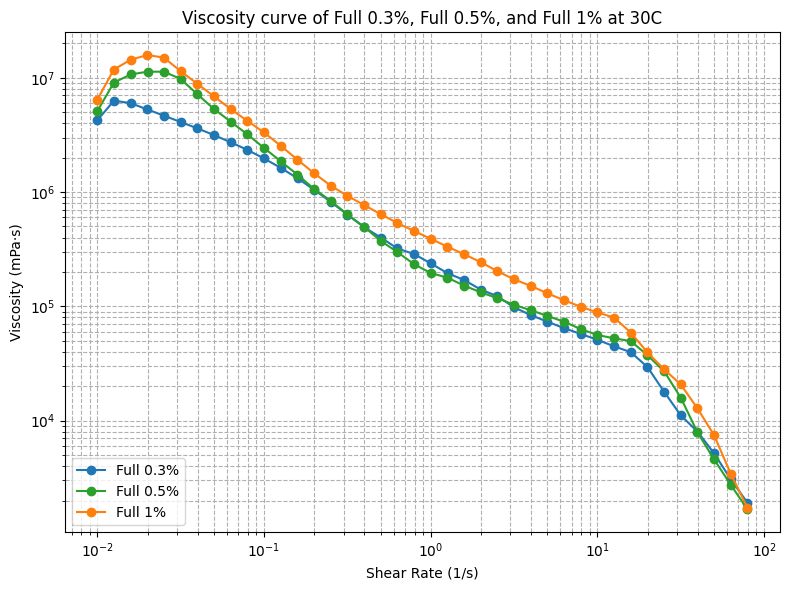

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0249	42.192				30	12.248	Dy_auto	5.001	4.23E+06
2	0.0813	79.275				30	23.014	Dy_auto	10	6.30E+06
3	0.152	94.974				30	27.571	Dy_auto	15	6.00E+06
4	0.242	105.3				30.01	30.568	Dy_auto	20	5.28E+06
5	0.354	117				30	33.967	Dy_auto	25	4.66E+06
6	0.496	129.67				30	37.645	Dy_auto	30.01	4.10E+06
7	0.675	143.7				30	41.715	Dy_auto	35.01	3.61E+06
8	0.9	157.98				30	45.862	Dy_auto	40.02	3.15E+06
9	1.18	172.1				30	49.962	Dy_auto	45.04	2.73E+06
10	1.54	185.82				30	53.945	Dy_auto	50.06	2.34E+06
11	1.99	196.55				30	57.058	Dy_auto	55.08	1.97E+06
12	2.56	204.96				30	59.502	Dy_auto	60.1	1.63E+06
13	3.27	209.77				30	60.897	Dy_auto	65.12	1.32E+06
14	4.17	209.23				30	60.74	Dy_auto	70.14	1.05E+06
15	5.3	206.33				30	59.9	Dy_auto	75.16	8.21E+05
16	6.73	200.79				30	58.291	Dy_auto	80.19	6.35E+05
17	8.52	196.46				30	57.034	Dy_auto	85.21	4.93E+05
18	10.8	200.58				30	58.229	Dy_auto	90.24	4.00E+05
19	13.6	202.75				30	58.859	Dy_auto	95.27	3.21E+05
20	17.2	227.74				30	66.114	Dy_auto	100.3	2.87E+05
21	21.7	237.92				30	69.07	Dy_auto	105.3	2.38E+05
22	27.4	245.99				30	71.413	Dy_auto	110.4	1.95E+05
23	34.6	269.84				30	78.335	Dy_auto	115.4	1.70E+05
24	43.6	279.88				30	81.251	Dy_auto	120.4	1.40E+05
25	54.9	308.38				30	89.523	Dy_auto	125.5	1.23E+05
26	69.2	310.09				30	90.021	Dy_auto	130.5	98033
27	87.2	334.1				30	96.991	Dy_auto	135.5	83897
28	110	368.52				30	106.98	Dy_auto	140.6	73506
29	138	406.57				30	118.03	Dy_auto	145.6	64415
30	174	456.23				30	132.44	Dy_auto	150.7	57414
31	220	509.99				30	148.05	Dy_auto	155.7	50979
32	277	563.26				30	163.52	Dy_auto	160.8	44723
33	348	630.06				30	182.91	Dy_auto	165.8	39737
34	439	588.14				30	170.74	Dy_auto	170.9	29461
35	553	449.79				30	130.58	Dy_auto	175.9	17896
36	696	351.85				30	102.14	Dy_auto	181	11120
37	877	319.6				30	92.78	Dy_auto	186	8023.3
38	1.10E+03	259.52				30	75.341	Dy_auto	191.1	5174.8
39	1.39E+03	193.57				30	56.194	Dy_auto	196.2	3065.6
40	1.75E+03	151.8				30	44.068	Dy_auto	201.2	1909.5
41	2.21E+03	120.1				30	34.866	Dy_auto	206.3	1200
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.025	50.936				29.98	14.787	Dy_auto	5	5.10E+06
2	0.0814	114.19				29.98	33.15	Dy_auto	10	9.08E+06
3	0.152	169.99				29.98	49.347	Dy_auto	15	1.07E+07
4	0.242	226.07				29.98	65.63	Dy_auto	20	1.13E+07
5	0.355	283.21				29.99	82.216	Dy_auto	25.01	1.13E+07
6	0.496	308.63				29.98	89.596	Dy_auto	30.01	9.77E+06
7	0.675	285.41				29.99	82.856	Dy_auto	35.01	7.17E+06
8	0.901	266.87				29.98	77.474	Dy_auto	40.03	5.33E+06
9	1.18	260.67				29.99	75.675	Dy_auto	45.04	4.13E+06
10	1.55	253.9				29.98	73.708	Dy_auto	50.11	3.20E+06
11	2	243.37				29.98	70.65	Dy_auto	55.13	2.43E+06
12	2.56	234.09				29.98	67.959	Dy_auto	60.14	1.86E+06
13	3.28	225.22				29.99	65.382	Dy_auto	65.16	1.42E+06
14	4.17	212.43				29.99	61.668	Dy_auto	70.18	1.06E+06
15	5.3	210.45				29.98	61.094	Dy_auto	75.2	8.38E+05
16	6.73	201.31				29.98	58.442	Dy_auto	80.22	6.37E+05
17	8.52	197.65				29.99	57.377	Dy_auto	85.25	4.96E+05
18	10.8	187.52				29.99	54.437	Dy_auto	90.27	3.74E+05
19	13.6	188.33				29.99	54.673	Dy_auto	95.3	2.98E+05
20	17.2	185.83				29.99	53.947	Dy_auto	100.3	2.34E+05
21	21.7	195.63				29.99	56.793	Dy_auto	105.4	1.96E+05
22	27.4	224.44				29.99	65.156	Dy_auto	110.4	1.78E+05
23	34.6	240.75				29.99	69.891	Dy_auto	115.4	1.52E+05
24	43.6	264.67				29.99	76.836	Dy_auto	120.5	1.33E+05
25	54.9	295.89				29.99	85.899	Dy_auto	125.5	1.18E+05
26	69.2	326.55				29.99	94.797	Dy_auto	130.5	1.03E+05
27	87.2	368.42				29.99	106.95	Dy_auto	135.6	92517
28	110	413.47				29.99	120.03	Dy_auto	140.6	82473
29	138	462.85				29.99	134.37	Dy_auto	145.7	73332
30	174	502.79				29.99	145.96	Dy_auto	150.7	63275
31	220	562.08				29.99	163.17	Dy_auto	155.7	56187
32	277	661.23				29.99	191.96	Dy_auto	160.8	52503
33	348	787.73				29.99	228.68	Dy_auto	165.8	49683
34	439	746.46				29.99	216.7	Dy_auto	170.9	37394
35	552	679.93				29.99	197.39	Dy_auto	175.9	27055
36	696	502.42				29.99	145.85	Dy_auto	181	15879
37	877	314.8				29.99	91.388	Dy_auto	186	7902.6
38	1.10E+03	229.59				29.99	66.65	Dy_auto	191.1	4577.8
39	1.39E+03	173.29				29.99	50.307	Dy_auto	196.2	2744.4
40	1.75E+03	133.08				29.99	38.633	Dy_auto	201.2	1674
41	2.21E+03	132.6				29.99	38.495	Dy_auto	206.3	1325
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0249	63.946				29.98	18.564	Dy_auto	5.001	6.41E+06
2	0.0813	148.25				29.98	43.038	Dy_auto	10	1.18E+07
3	0.152	228.31				29.98	66.281	Dy_auto	15	1.44E+07
4	0.242	315.75				29.98	91.665	Dy_auto	20	1.58E+07
5	0.355	376.33				29.98	109.25	Dy_auto	25.01	1.50E+07
6	0.496	360.59				29.98	104.68	Dy_auto	30.01	1.14E+07
7	0.675	352.61				29.98	102.37	Dy_auto	35.01	8.86E+06
8	0.9	344.37				29.98	99.971	Dy_auto	40.01	6.87E+06
9	1.18	335.75				29.98	97.47	Dy_auto	45.03	5.32E+06
10	1.54	333.38				29.98	96.782	Dy_auto	50.04	4.20E+06
11	1.99	332.22				29.98	96.444	Dy_auto	55.06	3.32E+06
12	2.56	320.04				29.98	92.909	Dy_auto	60.09	2.54E+06
13	3.27	304.42				29.98	88.374	Dy_auto	65.11	1.92E+06
14	4.17	291.65				29.98	84.667	Dy_auto	70.13	1.46E+06
15	5.3	286.04				29.98	83.038	Dy_auto	75.15	1.14E+06
16	6.73	293.01				29.98	85.062	Dy_auto	80.17	9.27E+05
17	8.52	306.61				29.98	89.011	Dy_auto	85.19	7.70E+05
18	10.8	321.08				29.98	93.211	Dy_auto	90.22	6.41E+05
19	13.6	338.23				29.98	98.188	Dy_auto	95.24	5.36E+05
20	17.2	362.52				29.98	105.24	Dy_auto	100.3	4.56E+05
21	21.7	390.01				29.98	113.22	Dy_auto	105.3	3.90E+05
22	27.4	419.18				29.98	121.69	Dy_auto	110.3	3.33E+05
23	34.5	452.81				29.98	131.45	Dy_auto	115.4	2.86E+05
24	43.5	486.55				29.98	141.25	Dy_auto	120.4	2.44E+05
25	54.9	509.88				29.98	148.02	Dy_auto	125.4	2.03E+05
26	69.2	544.86				29.98	158.17	Dy_auto	130.5	1.72E+05
27	87.1	601.94				29.98	174.74	Dy_auto	135.5	1.51E+05
28	110	652.41				29.98	189.4	Dy_auto	140.5	1.30E+05
29	138	714.49				29.98	207.42	Dy_auto	145.6	1.13E+05
30	174	788.47				29.98	228.9	Dy_auto	150.6	99235
31	219	885.3				29.98	257.01	Dy_auto	155.6	88504
32	276	1005.2				29.98	291.81	Dy_auto	160.7	79820
33	348	935.41				29.98	271.55	Dy_auto	165.7	58996
34	438	789.27				29.98	229.13	Dy_auto	170.8	39540
35	552	707.24				29.98	205.31	Dy_auto	175.8	28143
36	695	655.89				29.98	190.41	Dy_auto	180.9	20730
37	876	510.49				29.98	148.2	Dy_auto	185.9	12815
38	1.10E+03	373.36				29.98	108.39	Dy_auto	191	7444.9
39	1.39E+03	215.96				29.98	62.695	Dy_auto	196	3420.4
40	1.75E+03	137.64				29.98	39.957	Dy_auto	201.1	1731.4
41	2.21E+03	128.55				29.98	37.318	Dy_auto	206.2	1284.5
"""


def clean_and_extract_viscosity_vs_shear_rate(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()
    for col in ['Viscosity', 'Shear Stress']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Viscosity', 'Shear Stress'])
    # Calculate shear rate (1/s)
    df['Shear Rate'] = df['Shear Stress'] / (df['Viscosity'] * 1e-3)
    df = df[df['Shear Rate'] > 0]

    # Filter shear rate <= 100
    df = df[df['Shear Rate'] <= 100]

    return df['Shear Rate'], df['Viscosity'], label


datasets = [
    clean_and_extract_viscosity_vs_shear_rate(raw_data1, "Full 0.3%"),
    clean_and_extract_viscosity_vs_shear_rate(raw_data2, "Full 0.5%"),
    clean_and_extract_viscosity_vs_shear_rate(raw_data3, "Full 1%"),
]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

plt.figure(figsize=(8, 6))
for i, (shear_rate, viscosity, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    plt.plot(shear_rate, viscosity, marker='o', linestyle='-', color=color, label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Viscosity (mPa·s)')
plt.title('Viscosity curve of Full 0.3%, Full 0.5%, and Full 1% at 30C')
plt.legend(loc='lower left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

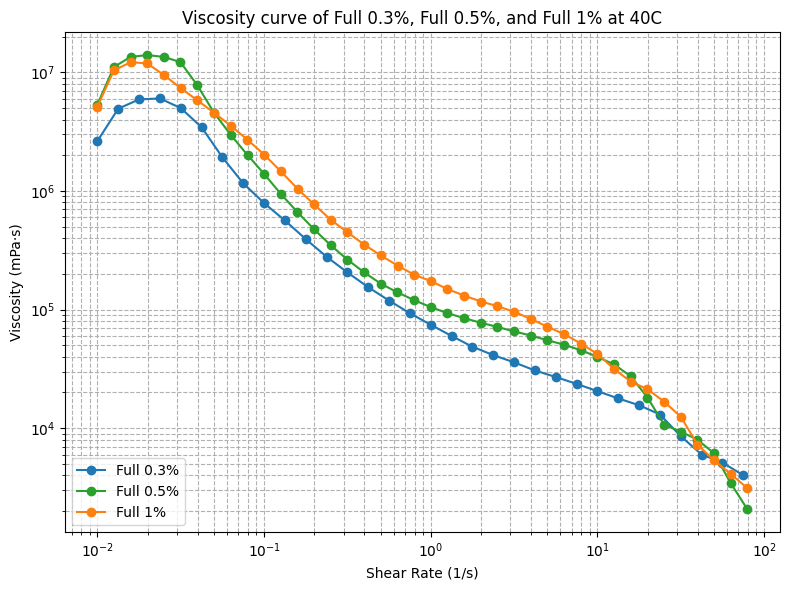

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0249	26.108				40	7.5792	Dy_auto	5	2.62E+06
2	0.0832	65.824				40	19.109	Dy_auto	10	4.94E+06
3	0.161	105.26				40	30.559	Dy_auto	15	5.92E+06
4	0.265	142.84				40	41.467	Dy_auto	20	6.03E+06
5	0.403	158.09				40	45.894	Dy_auto	25	5.00E+06
6	0.588	145.16				40	42.14	Dy_auto	30.03	3.44E+06
7	0.835	107.94				40	31.334	Dy_auto	35.05	1.92E+06
8	1.16	86.983				40	25.252	Dy_auto	40.08	1.16E+06
9	1.6	79.005				40	22.935	Dy_auto	45.1	7.90E+05
10	2.19	75.146				40	21.815	Dy_auto	50.13	5.64E+05
11	2.97	69.861				40	20.281	Dy_auto	55.15	3.93E+05
12	4.02	66.135				40	19.199	Dy_auto	60.18	2.79E+05
13	5.41	65.038				40	18.881	Dy_auto	65.21	2.06E+05
14	7.26	65.051				40	18.884	Dy_auto	70.25	1.54E+05
15	9.74	66.953				40	19.437	Dy_auto	75.28	1.19E+05
16	13	69.813				40	20.267	Dy_auto	80.32	93067
17	17.5	74.469				40	21.619	Dy_auto	85.36	74441
18	23.3	79.912				40	23.199	Dy_auto	90.4	59900
19	31.2	86.477				40	25.105	Dy_auto	95.45	48607
20	41.7	97.968				40	28.44	Dy_auto	100.5	41292
21	55.6	113.58				39.99	32.972	Dy_auto	105.5	35897
22	74.3	129.35				39.99	37.552	Dy_auto	110.6	30657
23	99.1	151.92				40	44.104	Dy_auto	115.6	27001
24	132	177.37				40	51.49	Dy_auto	120.7	23638
25	177	205.2				40	59.571	Dy_auto	125.7	20507
26	236	237.62				40	68.983	Dy_auto	130.8	17808
27	314	277.9				40	80.674	Dy_auto	135.9	15617
28	419	309.37				40	89.81	Dy_auto	140.9	13037
29	559	270.59				40	78.555	Dy_auto	146	8550.7
30	746	253.07				40	73.467	Dy_auto	151	5996.7
31	996	288.58				40	83.776	Dy_auto	156.1	5127.7
32	1.33E+03	300.5				40	87.236	Dy_auto	161.2	4003.9
33	1.77E+03	256.25				40	74.39	Dy_auto	166.2	2560.3
34	2.36E+03	241.15				40	70.007	Dy_auto	171.3	1806.7
35	3.15E+03	230.62				40	66.949	Dy_auto	176.4	1295.6
36	4.21E+03	276.62				40	80.305	Dy_auto	181.4	1165.4
37	5.61E+03	329.86				40	95.76	Dy_auto	186.5	1042.1
38	7.48E+03	396.63				40	115.14	Dy_auto	191.6	939.64
39	9.98E+03	382.91				39.99	111.16	Dy_auto	196.6	680.25
40	1.33E+04	400.12				40	116.16	Dy_auto	201.7	533.04
41	1.77E+04	431.39				40	125.23	Dy_auto	206.8	430.97
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0248	52.775				40	15.321	Dy_auto	5.001	5.30E+06
2	0.0813	139.21				40	40.412	Dy_auto	10	1.11E+07
3	0.152	213.42				40	61.955	Dy_auto	15	1.35E+07
4	0.242	278.41				40	80.824	Dy_auto	20	1.40E+07
5	0.354	338.08				40	98.146	Dy_auto	25.01	1.35E+07
6	0.496	384.16				40	111.52	Dy_auto	30.01	1.22E+07
7	0.675	308.77				40	89.638	Dy_auto	35.01	7.76E+06
8	0.9	228.49				40	66.331	Dy_auto	40.02	4.56E+06
9	1.19	187				40	54.287	Dy_auto	45.06	2.96E+06
10	1.54	159.9				40	46.419	Dy_auto	50.08	2.01E+06
11	1.99	139.22				40	40.416	Dy_auto	55.09	1.39E+06
12	2.56	119.04				40	34.559	Dy_auto	60.12	9.46E+05
13	3.27	105.18				40	30.533	Dy_auto	65.14	6.64E+05
14	4.17	94.673				40	27.484	Dy_auto	70.16	4.74E+05
15	5.31	87.571				40	25.422	Dy_auto	75.19	3.49E+05
16	6.73	83.385				40	24.207	Dy_auto	80.22	2.64E+05
17	8.53	82.024				40	23.812	Dy_auto	85.25	2.06E+05
18	10.8	82.899				40	24.066	Dy_auto	90.28	1.65E+05
19	13.6	88.109				40	25.578	Dy_auto	95.32	1.40E+05
20	17.2	95.485				40	27.72	Dy_auto	100.4	1.20E+05
21	21.8	104.79				40	30.422	Dy_auto	105.4	1.05E+05
22	27.4	117.54				40	34.123	Dy_auto	110.4	93341
23	34.6	134.28				40	38.982	Dy_auto	115.5	84699
24	43.6	154.55				40	44.865	Dy_auto	120.5	77431
25	55	179.37				40	52.07	Dy_auto	125.5	71382
26	69.3	206.98				40	60.088	Dy_auto	130.6	65431
27	87.3	240.68				40	69.871	Dy_auto	135.6	60434
28	110	276.4				40	80.24	Dy_auto	140.7	55128
29	139	319.14				40	92.648	Dy_auto	145.7	50560
30	175	361.33				40	104.9	Dy_auto	150.8	45470
31	220	399.04				40	115.84	Dy_auto	155.8	39886
32	277	434.44				40	126.12	Dy_auto	160.9	34493
33	349	433.71				40	125.91	Dy_auto	165.9	27352
34	439	362.05				40	105.11	Dy_auto	171	18135
35	553	268.69				40	78.002	Dy_auto	176	10691
36	697	296.11				40	85.962	Dy_auto	181.1	9358.4
37	878	318.51				40	92.465	Dy_auto	186.1	7995.7
38	1.11E+03	307.68				40	89.321	Dy_auto	191.2	6135.2
39	1.39E+03	216.52				40	62.857	Dy_auto	196.3	3429.2
40	1.75E+03	164.28				40	47.69	Dy_auto	201.3	2066.5
41	2.21E+03	157.69				40	45.779	Dy_auto	206.4	1575.7
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time	Viscosity

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]	[mPa·s]
1	0.0248	51.152				40	14.849	Dy_auto	5	5.13E+06
2	0.0813	130.55				39.99	37.9	Dy_auto	10	1.04E+07
3	0.152	193.49				39.99	56.169	Dy_auto	15	1.22E+07
4	0.242	236.64				39.99	68.698	Dy_auto	20	1.19E+07
5	0.354	238.08				39.99	69.114	Dy_auto	25	9.48E+06
6	0.496	232.42				39.99	67.474	Dy_auto	30.01	7.35E+06
7	0.675	231.19				39.99	67.117	Dy_auto	35.01	5.81E+06
8	0.9	228.81				39.99	66.425	Dy_auto	40.02	4.57E+06
9	1.18	223.84				39.99	64.981	Dy_auto	45.05	3.55E+06
10	1.54	215.08				39.99	62.439	Dy_auto	50.07	2.71E+06
11	1.99	202.78				39.99	58.866	Dy_auto	55.08	2.03E+06
12	2.56	184.78				39.99	53.643	Dy_auto	60.1	1.47E+06
13	3.27	165.44				39.99	48.028	Dy_auto	65.12	1.04E+06
14	4.17	153.65				39.99	44.604	Dy_auto	70.14	7.70E+05
15	5.3	143.46				39.99	41.648	Dy_auto	75.17	5.71E+05
16	6.73	141.88				39.99	41.188	Dy_auto	80.2	4.49E+05
17	8.52	140.65				39.99	40.83	Dy_auto	85.22	3.53E+05
18	10.8	143.54				39.99	41.671	Dy_auto	90.25	2.86E+05
19	13.6	148.5				39.99	43.111	Dy_auto	95.28	2.35E+05
20	17.2	156.47				39.99	45.424	Dy_auto	100.3	1.97E+05
21	21.7	173.91				39.99	50.486	Dy_auto	105.3	1.74E+05
22	27.4	187.33				39.99	54.383	Dy_auto	110.4	1.49E+05
23	34.6	208.3				39.99	60.471	Dy_auto	115.4	1.31E+05
24	43.6	233.96				39.99	67.92	Dy_auto	120.5	1.17E+05
25	54.9	268.11				39.99	77.832	Dy_auto	125.5	1.07E+05
26	69.2	303.3				39.99	88.048	Dy_auto	130.5	95883
27	87.2	332.21				39.99	96.443	Dy_auto	135.6	83423
28	110	359.01				39.99	104.22	Dy_auto	140.6	71607
29	138	392.18				39.99	113.85	Dy_auto	145.6	62134
30	174	411.27				39.99	119.39	Dy_auto	150.7	51755
31	220	422.77				39.99	122.73	Dy_auto	155.7	42259
32	277	397.47				39.99	115.39	Dy_auto	160.8	31558
33	349	390.98				39.99	113.5	Dy_auto	165.8	24657
34	439	426.1				39.99	123.7	Dy_auto	170.9	21345
35	553	420.43				39.99	122.05	Dy_auto	175.9	16728
36	696	395.15				39.99	114.71	Dy_auto	181	12488
37	877	289.95				39.99	84.174	Dy_auto	186.1	7278.7
38	1.11E+03	268.07				39.99	77.822	Dy_auto	191.1	5345.2
39	1.39E+03	259.15				39.99	75.231	Dy_auto	196.2	4104.3
40	1.75E+03	247.82				39.99	71.942	Dy_auto	201.3	3117.5
41	2.21E+03	219.22				39.99	63.639	Dy_auto	206.3	2190.4
"""


def clean_and_extract_viscosity_vs_shear_rate(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()
    for col in ['Viscosity', 'Shear Stress']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Viscosity', 'Shear Stress'])
    # Calculate shear rate (1/s)
    df['Shear Rate'] = df['Shear Stress'] / (df['Viscosity'] * 1e-3)
    df = df[df['Shear Rate'] > 0]

    # Filter shear rate <= 100
    df = df[df['Shear Rate'] <= 100]

    return df['Shear Rate'], df['Viscosity'], label


datasets = [
    clean_and_extract_viscosity_vs_shear_rate(raw_data1, "Full 0.3%"),
    clean_and_extract_viscosity_vs_shear_rate(raw_data2, "Full 0.5%"),
    clean_and_extract_viscosity_vs_shear_rate(raw_data3, "Full 1%"),
]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

plt.figure(figsize=(8, 6))
for i, (shear_rate, viscosity, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    plt.plot(shear_rate, viscosity, marker='o', linestyle='-', color=color, label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Viscosity (mPa·s)')
plt.title('Viscosity curve of Full 0.3%, Full 0.5%, and Full 1% at 40C')
plt.legend(loc='lower left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

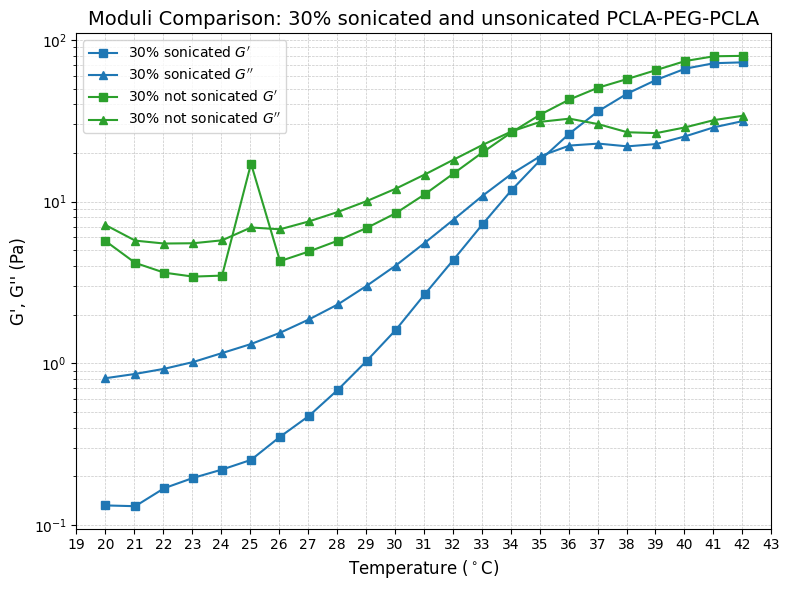

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	0.0082256	0.13198	0.80772	6.12	20	0.037836	TruStrain™
2	0.0101	0.008729	0.13051	0.85867	6.579	21.03	0.040151	TruStrain™
3	0.0101	0.0094363	0.16862	0.92364	5.478	22.03	0.043405	TruStrain™
4	0.0101	0.01041	0.19527	1.0172	5.209	23.03	0.047884	TruStrain™
5	0.0101	0.011824	0.22001	1.1557	5.253	24.03	0.054388	TruStrain™
6	0.0101	0.013454	0.25244	1.3146	5.207	25.03	0.061883	TruStrain™
7	0.0101	0.015894	0.35053	1.5421	4.399	26.03	0.073109	TruStrain™
8	0.0101	0.019339	0.47209	1.8654	3.951	27.03	0.088954	TruStrain™
9	0.0101	0.024229	0.68522	2.3114	3.373	28.03	0.11145	TruStrain™
10	0.0101	0.032051	1.0358	3.0161	2.912	29.03	0.14743	TruStrain™
11	0.0101	0.043523	1.6073	4.0212	2.502	30.03	0.20019	TruStrain™
12	0.0101	0.061919	2.6702	5.5521	2.079	31.03	0.28481	TruStrain™
13	0.0101	0.089369	4.3788	7.7393	1.767	32.03	0.41108	TruStrain™
14	0.0101	0.13124	7.2439	10.864	1.5	33.03	0.60365	TruStrain™
15	0.0101	0.19022	11.77	14.822	1.259	34.03	0.87496	TruStrain™
16	0.0101	0.26465	18.105	19.121	1.056	35.03	1.2173	TruStrain™
17	0.0101	0.34631	26.352	22.201	0.843	36.03	1.5929	TruStrain™
18	0.0101	0.43089	36.294	22.822	0.629	37.03	1.982	TruStrain™
19	0.0101	0.51746	46.574	21.948	0.471	38.03	2.3802	TruStrain™
20	0.0101	0.61279	56.596	22.683	0.401	39.03	2.8187	TruStrain™
21	0.0101	0.71396	66.37	25.326	0.382	40.03	3.284	TruStrain™
22	0.0101	0.77678	71.727	28.789	0.401	41.02	3.573	TruStrain™
23	0.0101	0.79571	72.638	31.494	0.434	42.03	3.6601	TruStrain™
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]
1	0.0101	0.092039	5.7037	7.1647	1.256	20	0.42335	TruStrain™
2	0.0101	0.07126	4.1737	5.7317	1.373	21.03	0.32778	TruStrain™
3	0.0101	0.066253	3.6332	5.5006	1.514	22.03	0.30475	TruStrain™
4	0.0101	0.065349	3.4334	5.5218	1.608	23.03	0.30059	TruStrain™
5	0.0101	0.067637	3.4834	5.7581	1.653	24.03	0.31111	TruStrain™
6	0.0101	0.18616	17.167	6.9129	0.403	25.03	0.85628	MV-,TruStrain™
7	0.0101	0.080211	4.2798	6.7363	1.574	26.03	0.36895	TruStrain™
8	0.0101	0.090389	4.9101	7.535	1.535	27.03	0.41576	TruStrain™
9	0.0101	0.10404	5.7288	8.6224	1.505	28.03	0.47857	TruStrain™
10	0.0101	0.12254	6.8735	10.071	1.465	29.03	0.56367	TruStrain™
11	0.0101	0.14775	8.472	12.014	1.418	30.03	0.67962	TruStrain™
12	0.0101	0.18501	11.086	14.695	1.326	31.03	0.85099	TruStrain™
13	0.0101	0.23638	14.93	18.173	1.217	32.03	1.0873	TruStrain™
14	0.0101	0.30287	20.149	22.408	1.112	33.03	1.3931	TruStrain™
15	0.0101	0.38344	26.799	27.155	1.013	34.03	1.7637	TruStrain™
16	0.0101	0.46688	34.486	31.124	0.903	35.02	2.1475	TruStrain™
17	0.0101	0.54038	42.787	32.561	0.761	36.03	2.4856	TruStrain™
18	0.0101	0.59212	50.627	30.132	0.595	37.02	2.7236	TruStrain™
19	0.0101	0.63593	57.306	26.827	0.468	38.03	2.9251	TruStrain™
20	0.0101	0.7062	65.075	26.505	0.407	39.03	3.2483	TruStrain™
21	0.0101	0.79793	73.996	28.77	0.389	40.03	3.6702	TruStrain™
22	0.0101	0.85794	79.18	31.899	0.403	41.02	3.9463	TruStrain™
23	0.0101	0.87025	79.654	33.954	0.426	42.03	4.0029	TruStrain™
"""



def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Temperature']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Temperature'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Temperature'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "30% sonicated"),
    clean_and_extract(raw_data2, "30% not sonicated"),
    # Add more like: clean_and_extract(raw_data3, "Sample C")
]


# Colors of datasets
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', 'violet']

plt.figure(figsize=(8, 6))

all_temps = []

for i, (temp, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_temps.extend(temp)
    plt.plot(temp, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(temp, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel(r"Temperature ($^\circ$C)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Moduli Comparison: 30% sonicated and unsonicated PCLA-PEG-PCLA", fontsize=14)

temp_min = int(np.floor(min(all_temps)))
temp_max = int(np.ceil(max(all_temps)))

plt.xlim(temp_min, temp_max)
plt.xticks(np.arange(temp_min - 1, temp_max + 1, 1))  # 1 degree steps on x-axis

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(fontsize=10) #for legend inside the plot
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # for legend outside the plot
#plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust layout to make space on the right
plt.show()

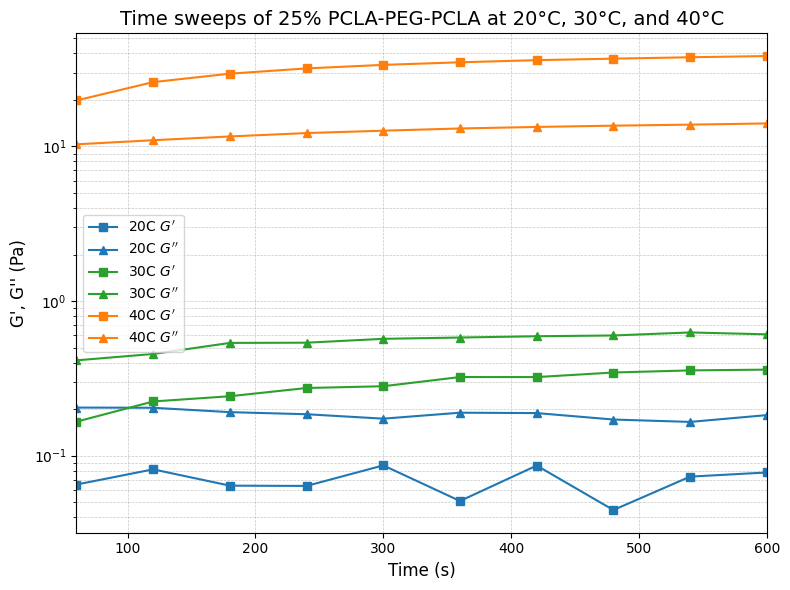

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	0.0021586	0.06503	0.2047	3.148	19.98	0.0099292	taD,TruStrain™	60
2	0.0101	0.0022081	0.081535	0.20401	2.502	19.99	0.010157	TruStrain™	120
3	0.0101	0.0020262	0.063967	0.19118	2.989	20	0.0093198	TruStrain™	180
4	0.0101	0.0019693	0.063694	0.1853	2.909	20	0.0090583	TruStrain™	240
5	0.0101	0.0019483	0.086484	0.17349	2.006	20	0.0089617	TruStrain™	300
6	0.0101	0.0019731	0.050896	0.18961	3.725	20	0.0090757	TruStrain™	360
7	0.0101	0.0020837	0.086281	0.18851	2.185	20	0.0095843	TruStrain™	420
8	0.0101	0.0017783	0.044492	0.17125	3.849	20	0.0081797	TruStrain™	480
9	0.0101	0.0018169	0.073169	0.16531	2.259	20	0.0083572	TruStrain™	540
10	0.0101	0.0019978	0.077834	0.1829	2.35	20	0.0091891	TruStrain™	600
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	0.0044783	0.16581	0.41358	2.494	30.13	0.020599	TruStrain™	60
2	0.0101	0.0050949	0.22414	0.45469	2.029	30.04	0.023435	TruStrain™	120
3	0.0101	0.0059135	0.24235	0.53617	2.212	30.01	0.027201	TruStrain™	180
4	0.0101	0.0060669	0.2739	0.53793	1.964	30	0.027906	TruStrain™	240
5	0.0101	0.0063861	0.28123	0.56978	2.026	30	0.029374	TruStrain™	300
6	0.0101	0.0066778	0.32247	0.58093	1.801	30	0.030716	TruStrain™	360
7	0.0101	0.0067749	0.32234	0.59203	1.837	30	0.031163	TruStrain™	420
8	0.0101	0.0069473	0.34501	0.59899	1.736	30	0.031956	TruStrain™	480
9	0.0101	0.0072426	0.35604	0.62654	1.76	30	0.033314	TruStrain™	540
10	0.0101	0.0071133	0.36013	0.60929	1.692	30	0.032719	TruStrain™	600
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	0.22484	19.847	10.324	0.52	40.07	1.0342	TruStrain™	60
2	0.0101	0.28441	26.082	10.979	0.421	40.03	1.3082	TruStrain™	120
3	0.0101	0.31936	29.578	11.611	0.393	40.01	1.469	TruStrain™	180
4	0.0101	0.34414	31.991	12.21	0.382	40	1.5829	TruStrain™	240
5	0.0101	0.36188	33.711	12.651	0.375	40	1.6645	TruStrain™	300
6	0.0101	0.37584	35.036	13.075	0.373	40	1.7288	TruStrain™	360
7	0.0101	0.38762	36.174	13.376	0.37	40	1.783	TruStrain™	420
8	0.0101	0.39622	36.991	13.632	0.369	40	1.8225	TruStrain™	480
9	0.0101	0.40421	37.761	13.845	0.367	40	1.8593	TruStrain™	540
10	0.0101	0.41171	38.464	14.093	0.366	40	1.8937	TruStrain™	600
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Time'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Time'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "20C"),
    clean_and_extract(raw_data2, "30C"),
    clean_and_extract(raw_data3, "40C"),
]


plt.figure(figsize=(8, 6))
all_times = []

for i, (time, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_times.extend(time)
    plt.plot(time, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(time, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Time sweeps of 25% PCLA-PEG-PCLA at 20°C, 30°C, and 40°C", fontsize=14)

plt.xlim(min(all_times), max(all_times))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

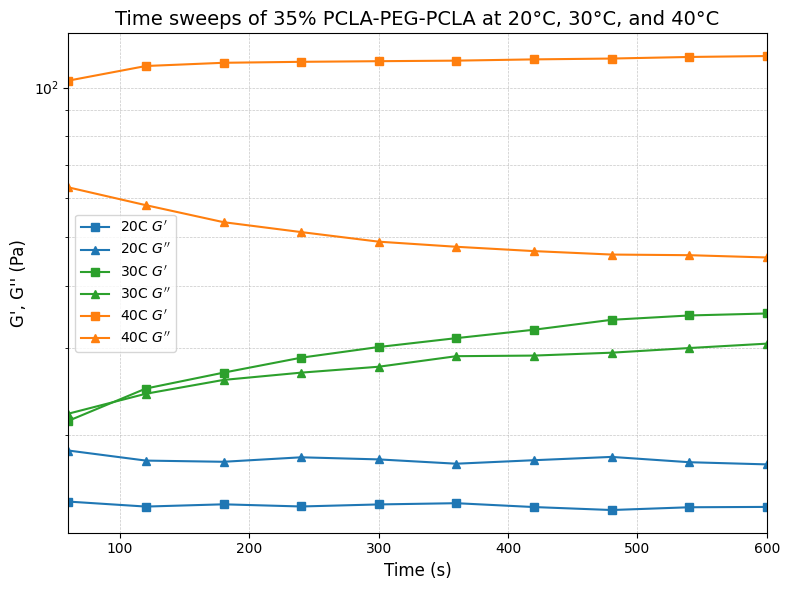

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	0.23864	14.714	18.636	1.267	20	0.069278	TruStrain™	60
2	0.0101	0.22987	14.378	17.788	1.237	20	0.066733	TruStrain™	120
3	0.0101	0.23007	14.529	17.69	1.218	20	0.066791	TruStrain™	180
4	0.0101	0.23205	14.384	18.061	1.256	20	0.067365	TruStrain™	240
5	0.0101	0.23155	14.521	17.886	1.232	20	0.067219	TruStrain™	300
6	0.0101	0.22934	14.604	17.533	1.201	20	0.066577	TruStrain™	360
7	0.0101	0.22992	14.346	17.819	1.242	20	0.066747	TruStrain™	420
8	0.0101	0.23086	14.15	18.094	1.279	20	0.06702	TruStrain™	480
9	0.0101	0.22855	14.332	17.655	1.232	20	0.066348	TruStrain™	540
10	0.0101	0.22731	14.355	17.478	1.217	20	0.06599	TruStrain™	600
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	0.30903	21.378	22.1	1.034	30.11	0.089711	TruStrain™	60
2	0.0101	0.34875	24.83	24.24	0.976	30.03	0.10124	TruStrain™	120
3	0.0101	0.3736	26.724	25.839	0.967	30.01	0.10846	TruStrain™	180
4	0.0101	0.39369	28.64	26.725	0.933	30	0.11429	TruStrain™	240
5	0.0101	0.40948	30.093	27.467	0.913	30	0.11887	TruStrain™	300
6	0.0101	0.42816	31.354	28.841	0.92	30	0.1243	TruStrain™	360
7	0.0101	0.43798	32.598	28.921	0.887	30	0.12715	TruStrain™	420
8	0.0101	0.45214	34.129	29.311	0.859	30	0.13126	TruStrain™	480
9	0.0101	0.46161	34.822	29.949	0.86	30	0.13401	TruStrain™	540
10	0.0101	0.46809	35.143	30.564	0.87	30	0.13589	TruStrain™	600
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	1.2156	103.25	63.009	0.61	40.05	0.3529	TruStrain™	60
2	0.0101	1.2543	110.49	58.015	0.525	40.01	0.36412	TruStrain™	120
3	0.0101	1.2493	112.15	53.628	0.478	40.01	0.36269	TruStrain™	180
4	0.0101	1.2437	112.65	51.225	0.455	40	0.36106	TruStrain™	240
5	0.0101	1.2377	112.98	48.999	0.434	40	0.35931	TruStrain™	300
6	0.0101	1.2359	113.27	47.856	0.422	40	0.35877	TruStrain™	360
7	0.0101	1.2383	113.93	46.907	0.412	40	0.35949	TruStrain™	420
8	0.0101	1.2395	114.37	46.163	0.404	40	0.35984	TruStrain™	480
9	0.0101	1.2469	115.21	46.029	0.4	40	0.36197	TruStrain™	540
10	0.0101	1.2498	115.71	45.545	0.394	40	0.36281	TruStrain™	600
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Time'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Time'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "20C"),
    clean_and_extract(raw_data2, "30C"),
    clean_and_extract(raw_data3, "40C"),
]


plt.figure(figsize=(8, 6))
all_times = []

for i, (time, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_times.extend(time)
    plt.plot(time, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(time, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Time sweeps of 35% PCLA-PEG-PCLA at 20°C, 30°C, and 40°C", fontsize=14)

plt.xlim(min(all_times), max(all_times))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

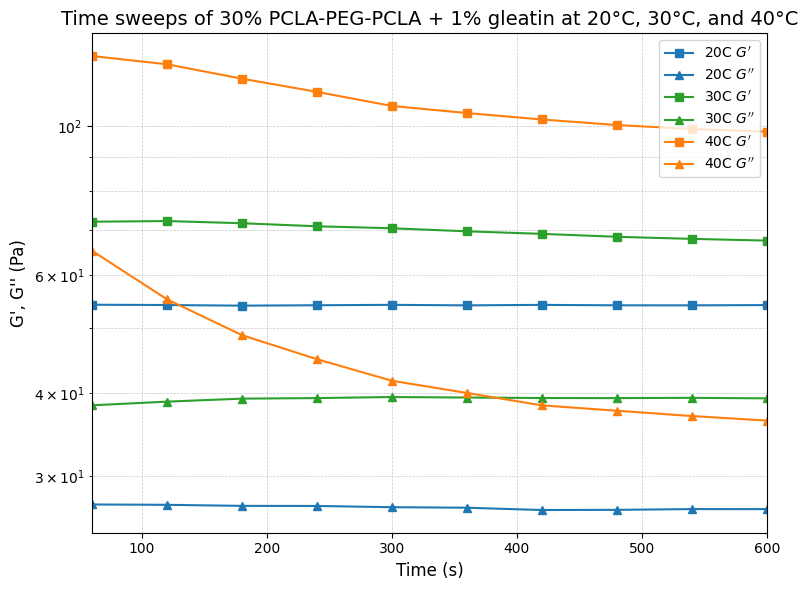

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	0.60915	54.145	27.237	0.503	20	0.17684	TruStrain™	60
2	0.0101	0.60848	54.087	27.203	0.503	20	0.17664	TruStrain™	120
3	0.0101	0.60699	53.971	27.106	0.502	20	0.17621	TruStrain™	180
4	0.0101	0.60765	54.048	27.097	0.501	20	0.1764	TruStrain™	240
5	0.0101	0.60778	54.12	26.982	0.499	20	0.17644	TruStrain™	300
6	0.0101	0.6067	54.024	26.934	0.499	20	0.17613	TruStrain™	360
7	0.0101	0.60656	54.114	26.721	0.494	20	0.17609	TruStrain™	420
8	0.0101	0.60589	54.033	26.737	0.495	20	0.17589	TruStrain™	480
9	0.0101	0.60618	54.029	26.807	0.496	20	0.17598	TruStrain™	540
10	0.0101	0.6066	54.077	26.804	0.496	20	0.1761	TruStrain™	600
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	0.82	72.034	38.31	0.532	30.01	0.23805	TruStrain™	60
2	0.0101	0.82375	72.201	38.793	0.537	30.01	0.23914	TruStrain™	120
3	0.0101	0.82095	71.664	39.198	0.547	30	0.23832	TruStrain™	180
4	0.0101	0.81469	70.913	39.271	0.554	30	0.23651	TruStrain™	240
5	0.0101	0.81116	70.43	39.415	0.56	30	0.23548	TruStrain™	300
6	0.0101	0.80438	69.696	39.346	0.565	30	0.23351	TruStrain™	360
7	0.0101	0.79875	69.09	39.28	0.569	30	0.23188	TruStrain™	420
8	0.0101	0.79264	68.395	39.269	0.574	30	0.23011	TruStrain™	480
9	0.0101	0.78859	67.908	39.307	0.579	30	0.22893	TruStrain™	540
10	0.0101	0.78472	67.505	39.236	0.581	30	0.22781	TruStrain™	600
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	1.4381	127.37	65.192	0.512	40.05	0.41749	TruStrain™	60
2	0.0101	1.3623	123.81	55.166	0.446	40.02	0.39548	TruStrain™	120
3	0.0101	1.2817	117.83	48.769	0.414	40	0.37208	TruStrain™	180
4	0.0101	1.2183	112.6	44.894	0.399	40	0.35369	TruStrain™	240
5	0.0101	1.1567	107.27	41.685	0.389	40	0.33578	TruStrain™	300
6	0.0101	1.1262	104.69	39.971	0.382	40	0.32695	TruStrain™	360
7	0.0101	1.0987	102.39	38.301	0.374	40	0.31897	TruStrain™	420
8	0.0101	1.0781	100.46	37.601	0.374	40	0.31297	TruStrain™	480
9	0.0101	1.0629	99.103	36.92	0.373	40	0.30856	TruStrain™	540
10	0.0101	1.0525	98.209	36.345	0.37	40	0.30553	TruStrain™	600
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Time'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Time'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "20C"),
    clean_and_extract(raw_data2, "30C"),
    clean_and_extract(raw_data3, "40C"),
]


plt.figure(figsize=(8, 6))
all_times = []

for i, (time, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_times.extend(time)
    plt.plot(time, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(time, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Time sweeps of 30% PCLA-PEG-PCLA + 1% gleatin at 20°C, 30°C, and 40°C", fontsize=14)

plt.xlim(min(all_times), max(all_times))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

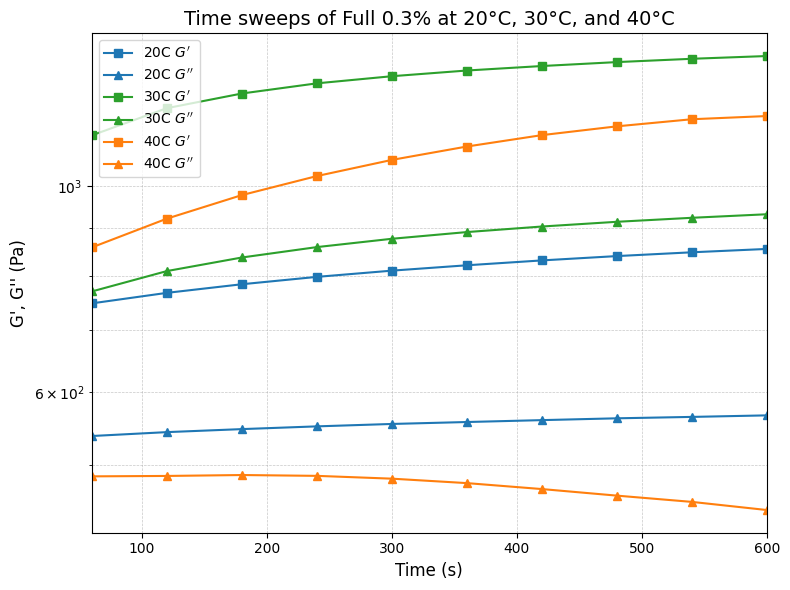

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	9.2557	747.5	537.92	0.72	20	2.687	TruStrain™	60
2	0.0101	9.4474	767.22	543.13	0.708	20	2.7426	TruStrain™	120
3	0.0101	9.6072	783.78	547.21	0.698	20	2.789	TruStrain™	180
4	0.0101	9.7479	798.23	550.94	0.69	20	2.8298	TruStrain™	240
5	0.0101	9.8695	810.65	554.24	0.684	20	2.8652	TruStrain™	300
6	0.0101	9.9749	821.52	556.91	0.678	20	2.8958	TruStrain™	360
7	0.0101	10.073	831.49	559.53	0.673	20	2.9241	TruStrain™	420
8	0.0101	10.162	840.47	562.06	0.669	20	2.95	TruStrain™	480
9	0.0101	10.239	848.41	564.02	0.665	20	2.9725	TruStrain™	540
10	0.0101	10.31	855.49	566.17	0.662	20	2.9931	TruStrain™	600
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	13.776	1134	769.94	0.679	30.12	3.9991	TruStrain™	60
2	0.0101	14.659	1213	809.82	0.668	30.03	4.2555	TruStrain™	120
3	0.0101	15.188	1257.9	837.54	0.666	30.01	4.4092	TruStrain™	180
4	0.0101	15.579	1290	859.42	0.666	30	4.5226	TruStrain™	240
5	0.0101	15.871	1313	877.33	0.668	30	4.6074	TruStrain™	300
6	0.0101	16.11	1331.7	892.04	0.67	30	4.6767	TruStrain™	360
7	0.0101	16.303	1346.6	904.41	0.672	30	4.7327	TruStrain™	420
8	0.0101	16.473	1359.8	915.06	0.673	30	4.7822	TruStrain™	480
9	0.0101	16.617	1371	924.2	0.674	30	4.824	TruStrain™	540
10	0.0101	16.742	1380.4	932.36	0.675	30	4.8602	TruStrain™	600
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	9.9212	858.83	486.7	0.567	40.06	2.8802	TruStrain™	60
2	0.0101	10.483	922.3	487.2	0.528	40.02	3.0433	TruStrain™	120
3	0.0101	10.984	977.75	488.3	0.499	40.01	3.1887	TruStrain™	180
4	0.0101	11.407	1025	487.3	0.475	40	3.3114	TruStrain™	240
5	0.0101	11.774	1066.9	483.92	0.454	40	3.4181	TruStrain™	300
6	0.0101	12.083	1102.9	478.61	0.434	40	3.5079	TruStrain™	360
7	0.0101	12.348	1134.5	471.6	0.416	40	3.5846	TruStrain™	420
8	0.0101	12.552	1159.5	463.98	0.4	40	3.6439	TruStrain™	480
9	0.0101	12.718	1180.1	456.84	0.387	40	3.6922	TruStrain™	540
10	0.0101	12.774	1189.5	447.71	0.376	40	3.7084	TruStrain™	600
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Time'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Time'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "20C"),
    clean_and_extract(raw_data2, "30C"),
    clean_and_extract(raw_data3, "40C"),
]


plt.figure(figsize=(8, 6))
all_times = []

for i, (time, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_times.extend(time)
    plt.plot(time, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(time, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Time sweeps of Full 0.3% at 20°C, 30°C, and 40°C", fontsize=14)

plt.xlim(min(all_times), max(all_times))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

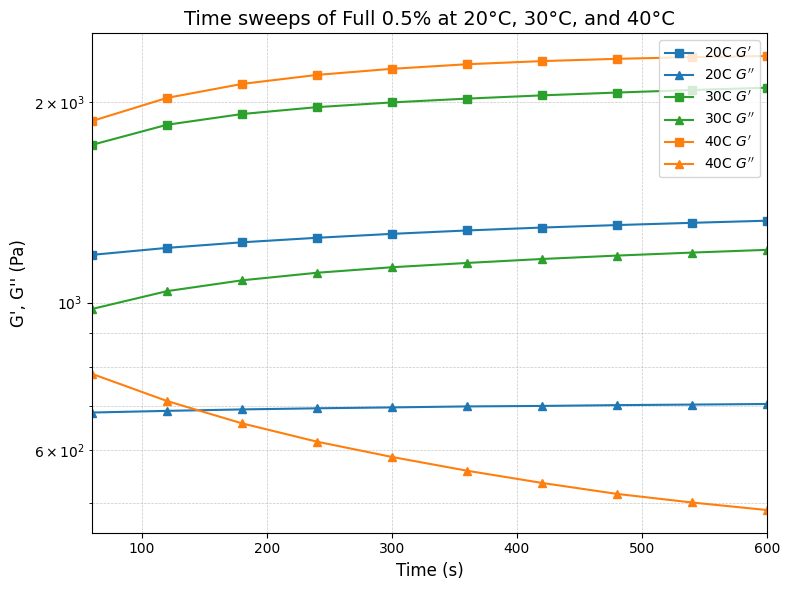

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	13.706	1179.9	683.72	0.579	20	3.9788	TruStrain™	60
2	0.0101	13.977	1208.7	687.67	0.569	20	4.0574	TruStrain™	120
3	0.0101	14.2	1232.3	691.11	0.561	20	4.1224	TruStrain™	180
4	0.0101	14.383	1251.7	693.83	0.554	20	4.1756	TruStrain™	240
5	0.0101	14.545	1268.8	695.95	0.548	20	4.2224	TruStrain™	300
6	0.0101	14.688	1283.8	698.34	0.544	20	4.2639	TruStrain™	360
7	0.0101	14.809	1296.8	699.53	0.539	20	4.2991	TruStrain™	420
8	0.0101	14.917	1308	701.47	0.536	20	4.3305	TruStrain™	480
9	0.0101	15.014	1318.2	702.82	0.533	20	4.3586	TruStrain™	540
10	0.0101	15.107	1327.9	704.19	0.53	20	4.3855	TruStrain™	600
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	19.945	1726.6	978.41	0.567	30.01	5.7902	TruStrain™	60
2	0.0101	21.34	1850.8	1040.7	0.562	30.01	6.1952	TruStrain™	120
3	0.0101	22.15	1920.9	1080.4	0.562	30	6.4301	TruStrain™	180
4	0.0101	22.695	1967.1	1109	0.564	30	6.5886	TruStrain™	240
5	0.0101	23.086	1999.6	1130.4	0.565	30	6.702	TruStrain™	300
6	0.0101	23.4	2026	1147.3	0.566	30	6.7931	TruStrain™	360
7	0.0101	23.678	2048.9	1163.1	0.568	30	6.8739	TruStrain™	420
8	0.0101	23.923	2069	1176.9	0.569	30	6.9449	TruStrain™	480
9	0.0101	24.142	2087.1	1189.2	0.57	30	7.0085	TruStrain™	540
10	0.0101	24.347	2104.1	1200.5	0.571	30	7.0681	TruStrain™	600
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	20.416	1875	781.49	0.417	39.95	5.9267	TruStrain™	60
2	0.0101	21.629	2031.1	711.47	0.35	39.99	6.2791	TruStrain™	120
3	0.0101	22.423	2131.6	658.57	0.309	40	6.5094	TruStrain™	180
4	0.0101	22.959	2199.2	618.16	0.281	40	6.6652	TruStrain™	240
5	0.0101	23.331	2246.1	586.29	0.261	40	6.773	TruStrain™	300
6	0.0101	23.613	2281.9	559.06	0.245	40	6.8548	TruStrain™	360
7	0.0101	23.803	2306.9	535.92	0.232	40.01	6.9101	TruStrain™	420
8	0.0101	23.937	2325.1	515.93	0.222	40	6.9489	TruStrain™	480
9	0.0101	24.036	2338.5	500.86	0.214	40	6.9777	TruStrain™	540
10	0.0101	24.1	2347.7	487.94	0.208	40	6.9963	TruStrain™	600
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Time'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Time'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "20C"),
    clean_and_extract(raw_data2, "30C"),
    clean_and_extract(raw_data3, "40C"),
]


plt.figure(figsize=(8, 6))
all_times = []

for i, (time, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_times.extend(time)
    plt.plot(time, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(time, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Time sweeps of Full 0.5% at 20°C, 30°C, and 40°C", fontsize=14)

plt.xlim(min(all_times), max(all_times))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

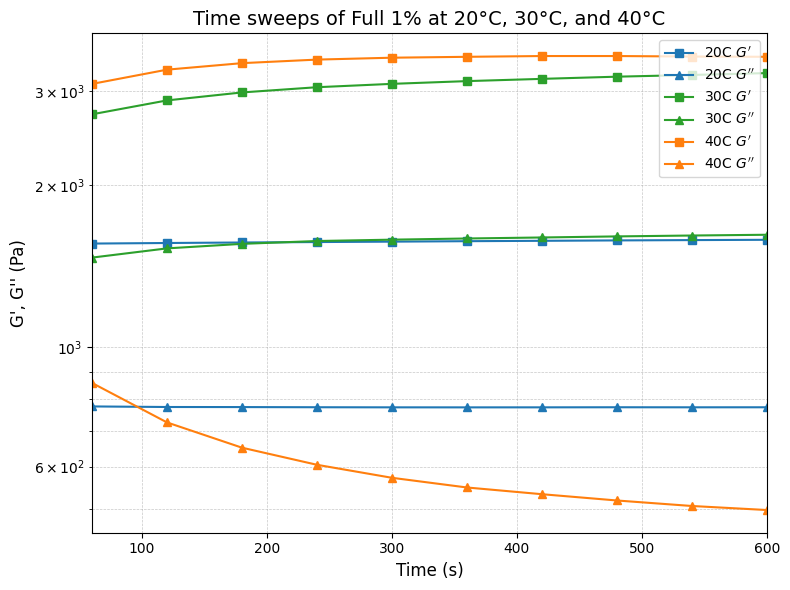

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO


raw_data1 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	17.511	1559.6	776.45	0.498	20	5.0834	TruStrain™	60
2	0.0101	17.535	1563.4	774.55	0.495	20	5.0905	TruStrain™	120
3	0.0101	17.565	1566.8	774.3	0.494	20	5.0992	TruStrain™	180
4	0.0101	17.589	1569.7	773.75	0.493	20	5.1062	TruStrain™	240
5	0.0101	17.612	1572.5	773.43	0.492	20	5.1129	TruStrain™	300
6	0.0101	17.64	1575.6	773.32	0.491	20	5.1209	TruStrain™	360
7	0.0101	17.662	1578.1	773.41	0.49	20	5.1275	TruStrain™	420
8	0.0101	17.688	1580.8	773.7	0.489	20	5.1349	TruStrain™	480
9	0.0101	17.707	1583	773.53	0.489	20	5.1405	TruStrain™	540
10	0.0101	17.726	1585	773.64	0.488	20	5.146	TruStrain™	600
"""

raw_data2 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	31.006	2713	1468.7	0.541	30.05	9.0011	TruStrain™	60
2	0.0101	32.759	2879.3	1527.8	0.531	30.02	9.5101	TruStrain™	120
3	0.0101	33.788	2979.2	1557.7	0.523	30	9.8088	TruStrain™	180
4	0.0101	34.476	3046.5	1576.7	0.518	29.99	10.008	TruStrain™	240
5	0.0101	34.913	3090.7	1585.9	0.513	29.99	10.136	TruStrain™	300
6	0.0101	35.277	3127.2	1593.9	0.51	29.99	10.241	TruStrain™	360
7	0.0101	35.579	3157.4	1600.8	0.507	29.99	10.329	TruStrain™	420
8	0.0101	35.878	3187.1	1608.2	0.505	29.99	10.415	TruStrain™	480
9	0.0101	36.119	3210.8	1614.3	0.503	29.99	10.485	TruStrain™	540
10	0.0101	36.373	3236.5	1619.6	0.5	29.99	10.559	TruStrain™	600
"""

raw_data3 = """Point No.	Shear Strain	Shear Stress	Storage Modulus	Loss Modulus	Loss Factor	Temperature	Torque	Status	Time

	[1]	[Pa]	[Pa]	[Pa]	[1]	[°C]	[µN·m]		[s]
1	0.0101	32.233	3090.1	858.43	0.278	40	9.3574	TruStrain™	60
2	0.0101	33.805	3284.5	724.98	0.221	40	9.8136	TruStrain™	120
3	0.0101	34.567	3377.3	650.67	0.193	40	10.035	TruStrain™	180
4	0.0101	34.994	3429	604.73	0.176	40	10.159	TruStrain™	240
5	0.0101	35.217	3457	571.98	0.165	39.99	10.223	TruStrain™	300
6	0.0101	35.31	3470.2	548.74	0.158	39.99	10.251	TruStrain™	360
7	0.0101	35.401	3481.8	533.18	0.153	40	10.277	TruStrain™	420
8	0.0101	35.38	3481.8	519.02	0.149	40	10.271	TruStrain™	480
9	0.0101	35.288	3474.3	506.93	0.146	40	10.244	TruStrain™	540
10	0.0101	35.237	3470.5	498.25	0.144	40	10.229	TruStrain™	600
"""


def clean_and_extract(raw, label):
    df = pd.read_csv(StringIO(raw), sep="\t", header=0, skiprows=[1])
    df.columns = df.columns.str.strip()

    for col in ['Storage Modulus', 'Loss Modulus', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.dropna(subset=['Storage Modulus', 'Loss Modulus', 'Time'])
    df = df[(df['Storage Modulus'] > 0) & (df['Loss Modulus'] > 0)]

    return df['Time'], df['Storage Modulus'], df['Loss Modulus'], label


datasets = [
    clean_and_extract(raw_data1, "20C"),
    clean_and_extract(raw_data2, "30C"),
    clean_and_extract(raw_data3, "40C"),
]


plt.figure(figsize=(8, 6))
all_times = []

for i, (time, Gp, Gpp, label) in enumerate(datasets):
    color = colors[i % len(colors)]
    all_times.extend(time)
    plt.plot(time, Gp, marker='s', linestyle='-', color=color, label=f"{label} $G'$")
    plt.plot(time, Gpp, marker='^', linestyle='-', color=color, label=f"{label} $G''$")

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel(r"G', G'' (Pa)", fontsize=12)
plt.yscale("log")
plt.title("Time sweeps of Full 1% at 20°C, 30°C, and 40°C", fontsize=14)

plt.xlim(min(all_times), max(all_times))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()